# __LAB 1: LINEAR REGRESSION__
***
Members:

*   19522195 - Dương Đình Thắng
*   19522179 - Trịnh Nhật Tân
*   19522395 - Trương Đình Đức Trí



# __Import các thư viện cần thiết__

In [ ]:
import requests
import copy

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, mean_squared_error, r2_score

# __Data__

## __Load data__
***
`url_train` = "https://cs.uit.edu.vn/data2.txt"

`url_test_1` = "https://cs.uit.edu.vn/data3.txt"

`url_test_2` = "https://cs.uit.edu.vn/data4.txt"

Dùng `requests.get(url).text` để lấy nội dung của url và viết vào file `.csv`.
***

In [ ]:
url_train = "https://cs.uit.edu.vn/data2.txt"
s = requests.get(url_train).text

with open("./train.csv", "w") as f:
    f.write("size,time\n")
    f.write(s)

In [ ]:
url_test_1 = "https://cs.uit.edu.vn/data3.txt"
s = requests.get(url_test_1).text

with open("./test_1.csv", "w") as f:
    f.write("size,time\n")
    f.write(s)

In [ ]:
url_test_2 = "https://cs.uit.edu.vn/data4.txt"
s = requests.get(url_test_2).text

with open("./test_2.csv", "w") as f:
    f.write("size,time\n")
    f.write(s)

## __Visualize Data__

### Training set

In [ ]:
df_train = pd.read_csv("./train.csv")
df_train.head()

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [ ]:
df_train.describe()

,size,time
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


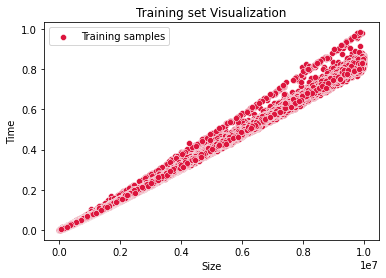

In [ ]:
sns.scatterplot(x='size', y='time', data=df_train, color='crimson')

plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(["Training samples"])
plt.title("Training set Visualization")
plt.show()

### Test set 1

In [ ]:
df_test_1 = pd.read_csv('./test_1.csv')
df_test_1.head()

,size,time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [ ]:
df_test_1.describe()

,size,time
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


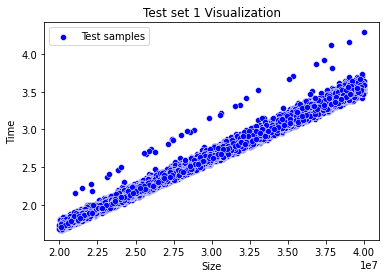

In [ ]:
sns.scatterplot(x='size', y='time', data=df_test_1, color="blue")

plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(["Test samples"])
plt.title("Test set 1 Visualization")
plt.show()

### Test set 2

In [ ]:
df_test_2 = pd.read_csv('./test_2.csv')
df_test_2.head()

,size,time
0,50142057,5.51836
1,65232531,7.18304
2,67683741,6.94395
3,59798449,5.48383
4,62297119,5.65503


In [ ]:
df_test_2.describe()

,size,time
count,6.023000e+03,6023.000000
mean,6.001134e+07,5.510494
std,5.788140e+06,0.571520
min,5.000951e+07,4.395220
25%,5.501938e+07,5.019585
50%,5.992788e+07,5.495210
75%,6.506852e+07,6.002910
max,6.999990e+07,7.615200


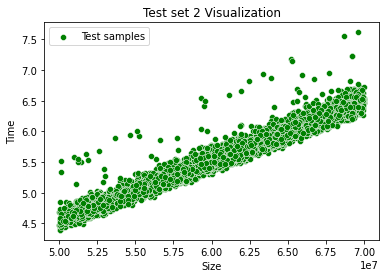

In [ ]:
sns.scatterplot(x='size', y='time', data=df_test_2, color="green")

plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(["Test samples"])
plt.title("Test set 2 Visualization")
plt.show()

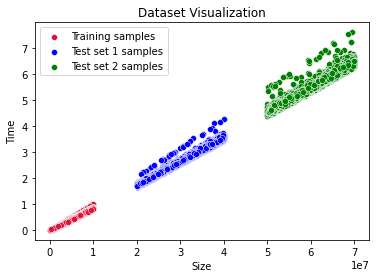

In [ ]:
sns.scatterplot(x='size', y='time', data=df_train, color='crimson')
sns.scatterplot(x='size', y='time', data=df_test_1, color="blue")
sns.scatterplot(x='size', y='time', data=df_test_2, color="green")

plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(("Training samples", "Test set 1 samples", "Test set 2 samples"))
plt.title("Dataset Visualization")
plt.show()

# __Tiền xử lý dữ liệu__

## Chuyển các dataframe về dạng np.darray

In [ ]:
# Training set
X_train, y_train = df_train.to_numpy(dtype=np.float32)[:, :-1], df_train.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

# Test set 1
X_test_1, y_test_1 = df_test_1.to_numpy(dtype=np.float32)[:, :-1], df_test_1.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

# Test set 2
X_test_2, y_test_2 = df_test_2.to_numpy(dtype=np.float32)[:, :-1], df_test_2.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

## Feature Scaling sử dụng Standard Scaler

Công thức: $z=\frac{x - μ}{σ}$


với $\mu = \frac{1}{N}𝚺^{N}_{i=1}x_i$

$σ = \sqrt(\frac{1}{N}𝚺_{i=1}^{N}(x_i - \mu)^2)$

In [ ]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scale = X_scaler.transform(X_train)
X_test_1_scale = X_scaler.transform(X_test_1)

In [ ]:
y_scaler = StandardScaler()
y_scaler.fit(y_train)

StandardScaler()

In [ ]:
y_train_scale = y_scaler.transform(y_train)
y_test_1_scale = y_scaler.transform(y_test_1)

# __Huấn luyện mô hình Linear Regression__

## Sử dụng class LinearRegression() trong thư viện sklearn

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train_scale, y_train_scale)

LinearRegression()

In [ ]:
lin_reg.coef_

array([[0.9987955]], dtype=float32)

In [ ]:
lin_reg.intercept_

array([-1.3831042e-08], dtype=float32)

## Đánh giá mô hình Linear Regression bằng độ đo R2 Score
Công thức $R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{Σ_{i=1}^{N}(y_i-ŷ_i)}{Σ_{i=1}^{N}(y_i-y̅)}$

In [ ]:
y_pred = lin_reg.predict(X_test_1_scale)

In [ ]:
print("R2 Score: ", lin_reg.score(y_pred, y_test_1_scale))

R2 Score:  0.9260356074251243


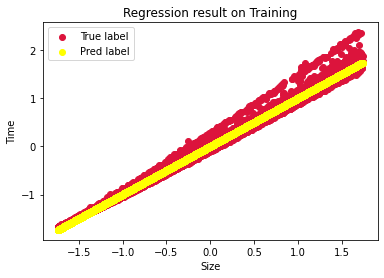

In [ ]:
y_pred = lin_reg.predict(X_train_scale)
plt.scatter(X_train_scale, y_train_scale, c="crimson")
plt.scatter(X_train_scale, y_pred, c="yellow")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend(("True label", "Pred label"))
plt.title("Regression result on Training")
plt.show()

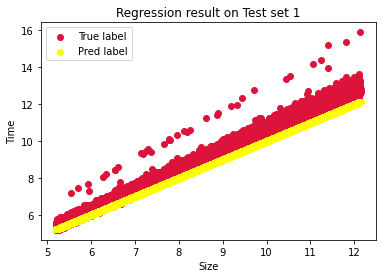

In [ ]:
y_pred = lin_reg.predict(X_test_1_scale)
plt.scatter(X_test_1_scale, y_test_1_scale, c="crimson")
plt.scatter(X_test_1_scale, y_pred, c="yellow")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend(("True label", "Pred label"))
plt.title("Regression result on Test set 1")
plt.show()

## Sử dụng SGDRegressor() trong thư viện sklearn kết hợp với thuật toán GridSearch để tìm bộ tham số tối ưu cho SGDRegressor

In [ ]:
tuned_parameters = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

score = 'r2'

In [ ]:
sgd_reg_gird = SGDRegressor(verbose=1)

In [ ]:
reg = GridSearchCV(sgd_reg_gird, tuned_parameters, scoring=score)

In [ ]:
reg = reg.fit(X_train_scale, y_train_scale)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 0.90, NNZs: 1, Bias: 0.000042, T: 56892, Avg. loss: 0.005851
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 1, Bias: -0.007565, T: 113784, Avg. loss: 0.005386
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.90, NNZs: 1, Bias: -0.011859, T: 170676, Avg. loss: 0.005388
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 1, Bias: 0.008874, T: 227568, Avg. loss: 0.005388
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.90, NNZs: 1, Bias: -0.000070, T: 284460, Avg. loss: 0.005385
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.90, NNZs: 1, Bias: -0.004478, T: 341352, Avg. loss: 0.005387
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.91, NNZs: 1, Bias: 0.001921, T: 56892, Avg. loss: 0.005886
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.90, NNZs: 1, Bias: -0.009242, T: 113784, Avg. loss: 0.005425
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 1, Bias: -0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.99, NNZs: 1, Bias: -0.016468, T: 284460, Avg. loss: 0.005535
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.012079, T: 341352, Avg. loss: 0.005533
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.007409, T: 56892, Avg. loss: 0.006015
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.001423, T: 113784, Avg. loss: 0.005547
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.003220, T: 170676, Avg. loss: 0.005542
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.014075, T: 227568, Avg. loss: 0.005540
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: 0.002796, T: 284460, Avg. loss: 0.005540
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.000852, T: 341352, Avg. loss: 0.005538
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Norm: 0.82, NNZs: 1, Bias: 0.004284, T: 341352, Avg. loss: 0.011043
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 1, Bias: -0.031481, T: 398244, Avg. loss: 0.011043
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.83, NNZs: 1, Bias: -0.020583, T: 56892, Avg. loss: 0.012171
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.84, NNZs: 1, Bias: -0.025468, T: 113784, Avg. loss: 0.011086
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.84, NNZs: 1, Bias: -0.015337, T: 170676, Avg. loss: 0.011057
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.82, NNZs: 1, Bias: -0.017001, T: 227568, Avg. loss: 0.011052
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 1, Bias: -0.025437, T: 284460, Avg. loss: 0.011066
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.81, NNZs: 1, Bias: -0.028523, T: 341352, Avg. loss: 0.011034
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 1, Bias: -0.012739,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.34, NNZs: 0, Bias: -0.010071, T: 113784, Avg. loss: 0.081753
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 0, Bias: -0.011302, T: 170676, Avg. loss: 0.081762
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 0, Bias: -0.014659, T: 227568, Avg. loss: 0.081753
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.53, NNZs: 0, Bias: -0.016088, T: 284460, Avg. loss: 0.081764
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.58, NNZs: 0, Bias: -0.025544, T: 341352, Avg. loss: 0.081755
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.24, NNZs: 0, Bias: -0.008316, T: 56892, Avg. loss: 0.081713
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.34, NNZs: 0, Bias: -0.013354, T: 113784, Avg. loss: 0.081717
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.41, NNZs: 0, Bias: -0.070239, T: 170676, Avg. loss: 0.081706
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.48, NNZs: 0, Bias: -0.023585

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.90, NNZs: 1, Bias: 0.003369, T: 113784, Avg. loss: 0.012867
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 1, Bias: -0.019240, T: 170676, Avg. loss: 0.012825
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.90, NNZs: 1, Bias: -0.022384, T: 227568, Avg. loss: 0.012863
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 1, Bias: -0.045071, T: 284460, Avg. loss: 0.012812
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 1, Bias: -0.015869, T: 341352, Avg. loss: 0.012840
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.89, NNZs: 1, Bias: -0.008221, T: 398244, Avg. loss: 0.012841
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.88, NNZs: 1, Bias: -0.023334, T: 56892, Avg. loss: 0.014011
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.88, NNZs: 1, Bias: -0.023118, T: 113784, Avg. loss: 0.012768
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 1, Bias: -0.027109,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.96, NNZs: 1, Bias: 0.040000, T: 56892, Avg. loss: 0.003840
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 1, Bias: 0.040000, T: 113784, Avg. loss: 0.003098
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 1, Bias: 0.020000, T: 170676, Avg. loss: 0.003105
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.94, NNZs: 1, Bias: 0.020000, T: 227568, Avg. loss: 0.003120
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.95, NNZs: 1, Bias: 0.030000, T: 284460, Avg. loss: 0.003084
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.96, NNZs: 1, Bias: 0.020000, T: 341352, Avg. loss: 0.003094
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 10.45, NNZs: 1, Bias: 0.020000, T: 56892, Avg. loss: 0.004503
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 14.76, NNZs: 1, Bias: 0.040000, T: 113784, Avg. loss: 0.003690
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 18.06, NNZs: 1, Bias: 0.030000, T: 17

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.020000, T: 284460, Avg. loss: 0.003604
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 1, Bias: 0.040000, T: 341352, Avg. loss: 0.003583
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: 0.030000, T: 56892, Avg. loss: 0.004480
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 1, Bias: 0.020000, T: 113784, Avg. loss: 0.003711
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 1, Bias: 0.030000, T: 170676, Avg. loss: 0.003720
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.030000, T: 227568, Avg. loss: 0.003746
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 1, Bias: 0.030000, T: 284460, Avg. loss: 0.003747
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 1, Bias: 0.020000, T: 341352, Avg. loss: 0.003733
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 second

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equ


Norm: 0.91, NNZs: 1, Bias: 0.000868, T: 113784, Avg. loss: 0.005372
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 1, Bias: 0.001234, T: 170676, Avg. loss: 0.005375
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 1, Bias: 0.001087, T: 227568, Avg. loss: 0.005374
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.91, NNZs: 1, Bias: 0.000698, T: 284460, Avg. loss: 0.005357
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 1, Bias: 0.000820, T: 341352, Avg. loss: 0.005383
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.91, NNZs: 1, Bias: -0.000640, T: 56892, Avg. loss: 0.005447
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 1, Bias: 0.000055, T: 113784, Avg. loss: 0.005377
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 1, Bias: -0.000033, T: 170676, Avg. loss: 0.005361
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 1, Bias: -0.000694, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 13.19, NNZs: 1, Bias: -0.000097, T: 398244, Avg. loss: 0.006257
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 4.39, NNZs: 1, Bias: -0.000331, T: 56892, Avg. loss: 0.006247
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.53, NNZs: 1, Bias: 0.000581, T: 113784, Avg. loss: 0.006062
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 4.61, NNZs: 1, Bias: 0.000001, T: 170676, Avg. loss: 0.006027
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 4.66, NNZs: 1, Bias: -0.000309, T: 227568, Avg. loss: 0.006063
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 4.70, NNZs: 1, Bias: -0.000151, T: 284460, Avg. loss: 0.006048
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 4.74, NNZs: 1, Bias: -0.000128, T: 341352, Avg. loss: 0.006032
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.001534, T: 56892, Avg. loss: 0.005616
Total training time: 0.00 seconds.
-- E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 0.83, NNZs: 1, Bias: -0.018962, T: 56892, Avg. loss: 0.011047
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 1, Bias: -0.020634, T: 113784, Avg. loss: 0.010851
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.83, NNZs: 1, Bias: -0.020093, T: 170676, Avg. loss: 0.010869
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.83, NNZs: 1, Bias: -0.020159, T: 227568, Avg. loss: 0.010873
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 1, Bias: -0.020204, T: 284460, Avg. loss: 0.010886
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 1, Bias: -0.020211, T: 341352, Avg. loss: 0.010875
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.82, NNZs: 1, Bias: -0.018987, T: 56892, Avg. loss: 0.011225
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 1, Bias: -0.020241, T: 113784, Avg. loss: 0.010946
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.82, NNZs: 1, Bias:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.38, NNZs: 0, Bias: -0.010570, T: 284460, Avg. loss: 0.081823
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.38, NNZs: 0, Bias: -0.010782, T: 341352, Avg. loss: 0.081822
Total training time: 0.06 seconds.
Convergence after 6 epochs took 0.06 seconds
-- Epoch 1
Norm: 0.46, NNZs: 0, Bias: -0.004795, T: 56892, Avg. loss: 0.081681
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 0, Bias: -0.007887, T: 113784, Avg. loss: 0.081658
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.46, NNZs: 0, Bias: -0.009223, T: 170676, Avg. loss: 0.081657
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 0, Bias: -0.009929, T: 227568, Avg. loss: 0.081657
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.46, NNZs: 0, Bias: -0.010306, T: 284460, Avg. loss: 0.081657
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.46, NNZs: 0, Bias: -0.010615, T: 341352, Avg. loss: 0.081657
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
--

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.89, NNZs: 1, Bias: -0.021156, T: 56892, Avg. loss: 0.012827
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 1, Bias: -0.021191, T: 113784, Avg. loss: 0.012757
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.89, NNZs: 1, Bias: -0.020764, T: 170676, Avg. loss: 0.012771
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 1, Bias: -0.020591, T: 227568, Avg. loss: 0.012745
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.89, NNZs: 1, Bias: -0.020634, T: 284460, Avg. loss: 0.012763
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 1, Bias: -0.020522, T: 341352, Avg. loss: 0.012748
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.89, NNZs: 1, Bias: -0.019735, T: 56892, Avg. loss: 0.012917
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 1, Bias: -0.019037, T: 113784, Avg. loss: 0.012659
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.89, NNZs: 1, Bias: -0.018866,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 0.95, NNZs: 1, Bias: 0.029782, T: 56892, Avg. loss: 0.003806
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 1, Bias: 0.029503, T: 113784, Avg. loss: 0.003403
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 1, Bias: 0.029164, T: 170676, Avg. loss: 0.003391
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.95, NNZs: 1, Bias: 0.029938, T: 227568, Avg. loss: 0.003412
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.95, NNZs: 1, Bias: 0.030874, T: 284460, Avg. loss: 0.003396
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.95, NNZs: 1, Bias: 0.031006, T: 341352, Avg. loss: 0.003409
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.95, NNZs: 1, Bias: 0.026186, T: 56892, Avg. loss: 0.003845
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 1, Bias: 0.025335, T: 113784, Avg. loss: 0.003465
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 1, Bias: 0.03015

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 4.78, NNZs: 1, Bias: 0.028336, T: 227568, Avg. loss: 0.003587
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 4.83, NNZs: 1, Bias: 0.027972, T: 284460, Avg. loss: 0.003599
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 4.86, NNZs: 1, Bias: 0.028313, T: 341352, Avg. loss: 0.003589
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 4.58, NNZs: 1, Bias: 0.030360, T: 56892, Avg. loss: 0.003311
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.73, NNZs: 1, Bias: 0.029981, T: 113784, Avg. loss: 0.003018
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 4.81, NNZs: 1, Bias: 0.028631, T: 170676, Avg. loss: 0.003020
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 4.86, NNZs: 1, Bias: 0.029671, T: 227568, Avg. loss: 0.003027
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4.91, NNZs: 1, Bias: 0.029517, T: 284460, Avg. loss: 0.003013
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 4.94, NNZs: 1, Bias: 0.028830, T: 3413

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.91, NNZs: 1, Bias: -0.001632, T: 56892, Avg. loss: 0.006826
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 1, Bias: -0.000448, T: 113784, Avg. loss: 0.005345
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 1, Bias: 0.001425, T: 170676, Avg. loss: 0.005336
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 1, Bias: -0.000266, T: 227568, Avg. loss: 0.005345
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.91, NNZs: 1, Bias: -0.003162, T: 284460, Avg. loss: 0.005336
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 1, Bias: 0.003692, T: 341352, Avg. loss: 0.005350
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.91, NNZs: 1, Bias: 0.000046, T: 398244, Avg. loss: 0.005330
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.91, NNZs: 1, Bias: 0.000125, T: 56892, Avg. loss: 0.006856
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 1, Bias: 0.000454, T: 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.91, NNZs: 1, Bias: 0.000944, T: 113784, Avg. loss: 0.005375
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 1, Bias: -0.002058, T: 170676, Avg. loss: 0.005372
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 1, Bias: -0.001953, T: 227568, Avg. loss: 0.005383
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.91, NNZs: 1, Bias: -0.000784, T: 284460, Avg. loss: 0.005378
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.91, NNZs: 1, Bias: 0.000060, T: 341352, Avg. loss: 0.005379
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.91, NNZs: 1, Bias: -0.000905, T: 398244, Avg. loss: 0.005380
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 0.91, NNZs: 1, Bias: -0.000834, T: 56892, Avg. loss: 0.006584
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 1, Bias: -0.001178, T: 113784, Avg. loss: 0.005169
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.91, NNZs: 1, Bias: 0.000238, T

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 6.21, NNZs: 1, Bias: -0.001903, T: 398244, Avg. loss: 0.006047
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.002612, T: 56892, Avg. loss: 0.006991
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: 0.001895, T: 113784, Avg. loss: 0.005459
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.000085, T: 170676, Avg. loss: 0.005462
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.000104, T: 227568, Avg. loss: 0.005455
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: 0.001482, T: 284460, Avg. loss: 0.005458
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: 0.000999, T: 341352, Avg. loss: 0.005453
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: -0.000466, T: 398244, Avg. loss: 0.005462
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Ep

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.99, NNZs: 1, Bias: -0.000838, T: 341352, Avg. loss: 0.005478
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: -0.000190, T: 398244, Avg. loss: 0.005501
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: 0.002374, T: 56892, Avg. loss: 0.007031
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.000864, T: 113784, Avg. loss: 0.005492
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: 0.000044, T: 170676, Avg. loss: 0.005497
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.000565, T: 227568, Avg. loss: 0.005489
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.000990, T: 284460, Avg. loss: 0.005491
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.000254, T: 341352, Avg. loss: 0.005505
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: 0.001300, T

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Norm: 0.83, NNZs: 1, Bias: -0.022588, T: 398244, Avg. loss: 0.010902
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.82, NNZs: 1, Bias: -0.018730, T: 56892, Avg. loss: 0.019484
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.82, NNZs: 1, Bias: -0.017559, T: 113784, Avg. loss: 0.010941
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.82, NNZs: 1, Bias: -0.021616, T: 170676, Avg. loss: 0.011029
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.82, NNZs: 1, Bias: -0.022029, T: 227568, Avg. loss: 0.011002
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.83, NNZs: 1, Bias: -0.018191, T: 284460, Avg. loss: 0.011002
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.82, NNZs: 1, Bias: -0.017417, T: 341352, Avg. loss: 0.010945
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.83, NNZs: 1, Bias: -0.021977, T: 398244, Avg. loss: 0.011046
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
--

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.82, NNZs: 1, Bias: -0.018704, T: 56892, Avg. loss: 0.019303
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.83, NNZs: 1, Bias: -0.018065, T: 113784, Avg. loss: 0.010914
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.82, NNZs: 1, Bias: -0.019349, T: 170676, Avg. loss: 0.010845
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 0.82, NNZs: 1, Bias: -0.021840, T: 227568, Avg. loss: 0.010844
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.82, NNZs: 1, Bias: -0.021070, T: 284460, Avg. loss: 0.010922
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.83, NNZs: 1, Bias: -0.022507, T: 341352, Avg. loss: 0.010931
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.82, NNZs: 1, Bias: -0.020253, T: 398244, Avg. loss: 0.010794
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.02, NNZs: 0, Bias: -0.018276, T: 56892, Avg. loss: 0.081824
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 0, Bias: -0.007386,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.02, NNZs: 0, Bias: -0.004384, T: 56892, Avg. loss: 0.081818
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 0, Bias: -0.008654, T: 113784, Avg. loss: 0.081818
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 0, Bias: -0.011740, T: 170676, Avg. loss: 0.081817
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 0, Bias: -0.012064, T: 227568, Avg. loss: 0.081817
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.03, NNZs: 0, Bias: -0.013628, T: 284460, Avg. loss: 0.081817
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.03, NNZs: 0, Bias: -0.011562, T: 341352, Avg. loss: 0.081817
Total training time: 0.06 seconds.
Convergence after 6 epochs took 0.06 seconds
-- Epoch 1
Norm: 0.02, NNZs: 0, Bias: -0.017553, T: 56892, Avg. loss: 0.081734
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 0, Bias: -0.015226, T: 113784, Avg. loss: 0.081732
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 0, Bias: -0.017424,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 0.88, NNZs: 1, Bias: -0.023871, T: 56892, Avg. loss: 0.022926
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.89, NNZs: 1, Bias: -0.018710, T: 113784, Avg. loss: 0.012801
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.89, NNZs: 1, Bias: -0.019259, T: 170676, Avg. loss: 0.012690
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.89, NNZs: 1, Bias: -0.015700, T: 227568, Avg. loss: 0.012616
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.89, NNZs: 1, Bias: -0.024619, T: 284460, Avg. loss: 0.012646
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 1, Bias: -0.022038, T: 341352, Avg. loss: 0.012685
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.89, NNZs: 1, Bias: -0.019479, T: 398244, Avg. loss: 0.012599
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.95, NNZs: 1, Bias: 0.027584, T: 56892, Avg. loss: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.94, NNZs: 1, Bias: 0.027024, T: 56892, Avg. loss: 0.005564
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 1, Bias: 0.031328, T: 113784, Avg. loss: 0.003432
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 1, Bias: 0.030235, T: 170676, Avg. loss: 0.003418
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 0.95, NNZs: 1, Bias: 0.033438, T: 227568, Avg. loss: 0.003410
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 0.95, NNZs: 1, Bias: 0.031101, T: 284460, Avg. loss: 0.003418
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.95, NNZs: 1, Bias: 0.033130, T: 341352, Avg. loss: 0.003419
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.95, NNZs: 1, Bias: 0.030238, T: 398244, Avg. loss: 0.003408
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.95, NNZs: 1, Bias: 0.030686, T: 56892, Avg. loss: 0.005594
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.95, NNZs: 1, Bias: 0.029271, T: 11378

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 4.06, NNZs: 1, Bias: 0.031031, T: 113784, Avg. loss: 0.003495
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 4.70, NNZs: 1, Bias: 0.030828, T: 170676, Avg. loss: 0.003492
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 5.21, NNZs: 1, Bias: 0.027504, T: 227568, Avg. loss: 0.003464
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 5.65, NNZs: 1, Bias: 0.028026, T: 284460, Avg. loss: 0.003466
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 6.04, NNZs: 1, Bias: 0.027249, T: 341352, Avg. loss: 0.003464
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 6.40, NNZs: 1, Bias: 0.031690, T: 398244, Avg. loss: 0.003490
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 3.18, NNZs: 1, Bias: 0.032277, T: 56892, Avg. loss: 0.005975
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.06, NNZs: 1, Bias: 0.027257, T: 113784, Avg. loss: 0.003609
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 4.69, NNZs: 1, Bias: 0.022905, T: 1706

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 5.21, NNZs: 1, Bias: 0.027652, T: 227568, Avg. loss: 0.003626
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 5.65, NNZs: 1, Bias: 0.025522, T: 284460, Avg. loss: 0.003606
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 6.05, NNZs: 1, Bias: 0.028953, T: 341352, Avg. loss: 0.003609
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 6.40, NNZs: 1, Bias: 0.027333, T: 398244, Avg. loss: 0.003594
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 3.18, NNZs: 1, Bias: 0.024172, T: 56892, Avg. loss: 0.005219
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.06, NNZs: 1, Bias: 0.025551, T: 113784, Avg. loss: 0.003019
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 4.70, NNZs: 1, Bias: 0.026412, T: 170676, Avg. loss: 0.003014
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.21, NNZs: 1, Bias: 0.029358, T: 227568, Avg. loss: 0.003043
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 5.66, NNZs: 1, Bias: 0.030660, T: 2844

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.04, NNZs: 1, Bias: 0.031375, T: 398244, Avg. loss: 0.003521
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.03, NNZs: 1, Bias: 0.030340, T: 56892, Avg. loss: 0.005576
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 1, Bias: 0.033037, T: 113784, Avg. loss: 0.003431
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.04, NNZs: 1, Bias: 0.029794, T: 170676, Avg. loss: 0.003436
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.028449, T: 227568, Avg. loss: 0.003429
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.032437, T: 284460, Avg. loss: 0.003430
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 1, Bias: 0.026547, T: 341352, Avg. loss: 0.003441
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 1, Bias: 0.031058, T: 398244, Avg. loss: 0.003432
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equ

Norm: 1.03, NNZs: 1, Bias: 0.027663, T: 341352, Avg. loss: 0.002927
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 1, Bias: 0.030528, T: 398244, Avg. loss: 0.002934
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: 0.001462, T: 56892, Avg. loss: 0.001740
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: 0.002046, T: 113784, Avg. loss: 0.001285
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.001711, T: 170676, Avg. loss: 0.001285
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 1, Bias: -0.002045, T: 227568, Avg. loss: 0.001286
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: 0.000924, T: 284460, Avg. loss: 0.001286
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: 0.001982, T: 341352, Avg. loss: 0.001285
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 4.84, NNZs: 1, Bias: 0.002073, T: 113784, Avg. loss: 0.001315
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.89, NNZs: 1, Bias: 0.004308, T: 170676, Avg. loss: 0.001316
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 1, Bias: -0.005425, T: 227568, Avg. loss: 0.001315
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 7.56, NNZs: 1, Bias: 0.003236, T: 284460, Avg. loss: 0.001315
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 8.27, NNZs: 1, Bias: 0.003605, T: 341352, Avg. loss: 0.001316
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 3.49, NNZs: 1, Bias: 0.000266, T: 56892, Avg. loss: 0.001769
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.84, NNZs: 1, Bias: -0.005016, T: 113784, Avg. loss: 0.001310
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.89, NNZs: 1, Bias: -0.003719, T: 170676, Avg. loss: 0.001311
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 6.78, NNZs: 1, Bias: -0.001895, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 1.08, NNZs: 1, Bias: 0.004937, T: 56892, Avg. loss: 0.001766
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: 0.001224, T: 113784, Avg. loss: 0.001318
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 1, Bias: 0.003772, T: 170676, Avg. loss: 0.001319
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 1, Bias: -0.004036, T: 227568, Avg. loss: 0.001318
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: -0.003858, T: 284460, Avg. loss: 0.001319
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.005453, T: 341352, Avg. loss: 0.001317
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.07, NNZs: 1, Bias: -0.005898, T: 56892, Avg. loss: 0.001556
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: 0.000167, T: 113784, Avg. loss: 0.001107
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 1, Bias: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.001250, T: 170676, Avg. loss: 0.000992
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.003937, T: 227568, Avg. loss: 0.000993
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.004441, T: 284460, Avg. loss: 0.000993
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.004172, T: 341352, Avg. loss: 0.000993
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 3.48, NNZs: 1, Bias: 0.001153, T: 56892, Avg. loss: 0.001947
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.83, NNZs: 1, Bias: -0.000024, T: 113784, Avg. loss: 0.001063
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.87, NNZs: 1, Bias: -0.000268, T: 170676, Avg. loss: 0.001063
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 6.76, NNZs: 1, Bias: -0.005719, T: 227568, Avg. loss: 0.001064
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 7.55, NNZs: 1, Bias:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.002783, T: 341352, Avg. loss: 0.001063
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.07, NNZs: 1, Bias: -0.003497, T: 56892, Avg. loss: 0.001912
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: -0.000590, T: 113784, Avg. loss: 0.001094
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 1, Bias: 0.002993, T: 170676, Avg. loss: 0.001095
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 1, Bias: -0.004167, T: 227568, Avg. loss: 0.001095
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: -0.006959, T: 284460, Avg. loss: 0.001094
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.005380, T: 341352, Avg. loss: 0.001095
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.07, NNZs: 1, Bias: -0.007611, T: 56892, Avg. loss: 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.020000, T: 113784, Avg. loss: 0.001969
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.030000, T: 170676, Avg. loss: 0.001969
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.001971
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.030000, T: 284460, Avg. loss: 0.001977
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: 0.020000, T: 341352, Avg. loss: 0.001980
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.030000, T: 56892, Avg. loss: 0.002773
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.97, NNZs: 1, Bias: 0.010000, T: 113784, Avg. loss: 0.002016
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: 0.020000, T: 170676, Avg. loss: 0.002024
Total training time: 0.01 seconds.
-- Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 3.50, NNZs: 1, Bias: 0.020000, T: 56892, Avg. loss: 0.002759
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.86, NNZs: 1, Bias: 0.020000, T: 113784, Avg. loss: 0.002017
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 5.91, NNZs: 1, Bias: 0.020000, T: 170676, Avg. loss: 0.002024
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 6.80, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.002028
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 7.59, NNZs: 1, Bias: -0.000000, T: 284460, Avg. loss: 0.002010
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 8.30, NNZs: 1, Bias: 0.020000, T: 341352, Avg. loss: 0.002022
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 3.50, NNZs: 1, Bias: -0.010000, T: 56892, Avg. loss: 0.002091
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.86, NNZs: 1, Bias: 0.010000, T: 113784, Avg. loss: 0.001354
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.91, NNZs: 1, Bias: 0.010

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: nan, NNZs: 1, Bias: 0.002339, T: 56892, Avg. loss: 520574221536258880.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: nan, NNZs: 1, Bias: 0.000710, T: 113784, Avg. loss: 0.001272
Total training time: 0.01 seconds.
-- Epoch 3
Norm: nan, NNZs: 1, Bias: 0.000217, T: 170676, Avg. loss: 0.001271
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.60, NNZs: 1, Bias: -0.000389, T: 227568, Avg. loss: 0.001271
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 1, Bias: 0.000208, T: 284460, Avg. loss: 0.001272
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.84, NNZs: 1, Bias: 0.000998, T: 341352, Avg. loss: 0.001271
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.88, NNZs: 1, Bias: 0.000482, T: 398244, Avg. loss: 0.001271
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.85, NNZs: 1, Bias: -0.002610, T: 56892, Avg. loss: 551256998246728576.000000
Total training time: 0.00 seconds.
-- Epoch 2
N

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 484.57, NNZs: 1, Bias: 0.000800, T: 113784, Avg. loss: 0.001302
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 343.33, NNZs: 1, Bias: -0.000772, T: 170676, Avg. loss: 0.001301
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 268.86, NNZs: 1, Bias: -0.000623, T: 227568, Avg. loss: 0.001301
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 222.42, NNZs: 1, Bias: -0.000616, T: 284460, Avg. loss: 0.001301
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 190.49, NNZs: 1, Bias: 0.000218, T: 341352, Avg. loss: 0.001302
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 167.10, NNZs: 1, Bias: -0.000300, T: 398244, Avg. loss: 0.001301
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 9096.82, NNZs: 1, Bias: -0.001176, T: 56892, Avg. loss: 101906674110735319040.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 5047.93, NNZs: 1, Bias: 0.000825, T: 113784, Avg. loss: 0.001297
Total training time: 0.01 seconds.
-- Epoch 3
N

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.003956, T: 113784, Avg. loss: 0.001062
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.001392, T: 170676, Avg. loss: 0.001063
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.002181, T: 227568, Avg. loss: 0.001062
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.000478, T: 284460, Avg. loss: 0.001063
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.002145, T: 341352, Avg. loss: 0.001062
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.001854, T: 56892, Avg. loss: 0.001108
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.002242, T: 113784, Avg. loss: 0.001084
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.002847, T: 170676, Avg. loss: 0.001083
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 4.20, NNZs: 1, Bias: -0.001444, T: 170676, Avg. loss: 0.001085
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 4.27, NNZs: 1, Bias: -0.002653, T: 227568, Avg. loss: 0.001085
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 4.32, NNZs: 1, Bias: -0.003132, T: 284460, Avg. loss: 0.001084
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 1, Bias: -0.003459, T: 341352, Avg. loss: 0.001084
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 3.96, NNZs: 1, Bias: -0.001512, T: 56892, Avg. loss: 0.001014
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.13, NNZs: 1, Bias: -0.001377, T: 113784, Avg. loss: 0.000987
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 4.23, NNZs: 1, Bias: -0.002287, T: 170676, Avg. loss: 0.000986
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 4.29, NNZs: 1, Bias: -0.001868, T: 227568, Avg. loss: 0.000986
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 4.35, NNZs: 1, Bias: -0.001661

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.07, NNZs: 1, Bias: -0.003224, T: 227568, Avg. loss: 0.000985
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: -0.001457, T: 284460, Avg. loss: 0.000986
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.001464, T: 341352, Avg. loss: 0.000984
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: 0.034829, T: 56892, Avg. loss: 0.005410
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: 0.026407, T: 113784, Avg. loss: 0.001733
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: 0.026528, T: 170676, Avg. loss: 0.001724
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: 0.024395, T: 227568, Avg. loss: 0.001720
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: 0.021510, T: 284460, Avg. loss: 0.001725
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: 0.025118, T: 3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Norm: 7.48, NNZs: 1, Bias: 0.024065, T: 398244, Avg. loss: 0.001716
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 6.67, NNZs: 1, Bias: 0.011691, T: 56892, Avg. loss: 0.005336
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.77, NNZs: 1, Bias: 0.017903, T: 113784, Avg. loss: 0.001828
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 6.83, NNZs: 1, Bias: 0.019356, T: 170676, Avg. loss: 0.001811
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 6.87, NNZs: 1, Bias: 0.017064, T: 227568, Avg. loss: 0.001807
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 6.90, NNZs: 1, Bias: 0.020836, T: 284460, Avg. loss: 0.001798
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 6.93, NNZs: 1, Bias: 0.018466, T: 341352, Avg. loss: 0.001806
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 6.95, NNZs: 1, Bias: 0.017522, T: 398244, Avg. loss: 0.001802
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.07, NNZs: 1, Bias: 0.022019, T: 56892, Avg. loss: 0.005388
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: 0.016860, T: 113784, Avg. loss: 0.001827
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 1, Bias: 0.020436, T: 170676, Avg. loss: 0.001813
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 1, Bias: 0.019968, T: 227568, Avg. loss: 0.001808
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 1, Bias: 0.017989, T: 284460, Avg. loss: 0.001803
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 1, Bias: 0.021052, T: 341352, Avg. loss: 0.001802
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.08, NNZs: 1, Bias: 0.019188, T: 398244, Avg. loss: 0.001798
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.08, NNZs: 1, Bias: 0.022967, T: 56892, Avg. loss: 0.005193
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: 0.022474, T: 11378

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.99, NNZs: 1, Bias: -0.000777, T: 398244, Avg. loss: 0.001271
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: 0.000613, T: 56892, Avg. loss: 0.002706
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.000349, T: 113784, Avg. loss: 0.001301
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.000163, T: 170676, Avg. loss: 0.001301
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: 0.000931, T: 227568, Avg. loss: 0.001301
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.000553, T: 284460, Avg. loss: 0.001300
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.000031, T: 341352, Avg. loss: 0.001302
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: -0.001785, T: 398244, Avg. loss: 0.001300
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.99, NNZs: 1, Bias: 0.000575, T: 113784, Avg. loss: 0.001095
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: 0.000395, T: 170676, Avg. loss: 0.001094
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.000062, T: 227568, Avg. loss: 0.001094
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: 0.000803, T: 284460, Avg. loss: 0.001094
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: 0.000130, T: 341352, Avg. loss: 0.001094
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: 0.000407, T: 398244, Avg. loss: 0.001094
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.39, NNZs: 1, Bias: -0.000473, T: 56892, Avg. loss: 0.002609
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.61, NNZs: 1, Bias: -0.001614, T: 113784, Avg. loss: 0.001272
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 1, Bias: 0.000297, T: 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: -0.001370, T: 56892, Avg. loss: 0.002664
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: -0.000975, T: 113784, Avg. loss: 0.001302
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 1, Bias: -0.000939, T: 170676, Avg. loss: 0.001301
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 1, Bias: 0.000747, T: 227568, Avg. loss: 0.001302
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: -0.000090, T: 284460, Avg. loss: 0.001301
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.001216, T: 341352, Avg. loss: 0.001301
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.07, NNZs: 1, Bias: 0.000343, T: 398244, Avg. loss: 0.001302
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: 0.000099, T: 56892, Avg. loss: 0.002593
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.04, NNZs: 1, Bias: 0.000160, T: 56892, Avg. loss: 0.002437
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: 0.000354, T: 113784, Avg. loss: 0.001094
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 1, Bias: -0.001579, T: 170676, Avg. loss: 0.001094
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 1, Bias: -0.000143, T: 227568, Avg. loss: 0.001095
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: 0.000962, T: 284460, Avg. loss: 0.001094
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.000583, T: 341352, Avg. loss: 0.001094
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.07, NNZs: 1, Bias: -0.000470, T: 398244, Avg. loss: 0.001094
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.002673, T: 56892, Avg. loss: 0.006017
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.002938, T:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.001290, T: 170676, Avg. loss: 0.001062
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.000889, T: 227568, Avg. loss: 0.001062
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.002863, T: 284460, Avg. loss: 0.001062
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.001360, T: 341352, Avg. loss: 0.001063
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: -0.001668, T: 398244, Avg. loss: 0.001062
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 0.98, NNZs: 1, Bias: -0.004045, T: 56892, Avg. loss: 0.006017
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.002445, T: 113784, Avg. loss: 0.001084
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.003087, T: 170676, Avg. loss: 0.001083
Total training time: 0.03 seconds.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.75, NNZs: 1, Bias: -0.002184, T: 170676, Avg. loss: 0.001055
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.89, NNZs: 1, Bias: -0.002604, T: 227568, Avg. loss: 0.001056
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 1, Bias: -0.002659, T: 284460, Avg. loss: 0.001055
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 2.13, NNZs: 1, Bias: -0.002237, T: 341352, Avg. loss: 0.001056
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 2.24, NNZs: 1, Bias: -0.002540, T: 398244, Avg. loss: 0.001056
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.35, NNZs: 1, Bias: -0.002674, T: 56892, Avg. loss: 0.006592
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.57, NNZs: 1, Bias: -0.002028, T: 113784, Avg. loss: 0.001087
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 1, Bias: -0.002996, T: 170676, Avg. loss: 0.001087
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.89, NNZs: 1, Bias: -0.002363

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 2.13, NNZs: 1, Bias: -0.002642, T: 341352, Avg. loss: 0.001085
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 2.24, NNZs: 1, Bias: -0.001435, T: 398244, Avg. loss: 0.001085
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.35, NNZs: 1, Bias: -0.002295, T: 56892, Avg. loss: 0.006539
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.57, NNZs: 1, Bias: -0.002201, T: 113784, Avg. loss: 0.000987
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 1, Bias: -0.001476, T: 170676, Avg. loss: 0.000986
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.89, NNZs: 1, Bias: -0.002472, T: 227568, Avg. loss: 0.000986
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 1, Bias: -0.001394, T: 284460, Avg. loss: 0.000987
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 2.13, NNZs: 1, Bias: -0.002041, T: 341352, Avg. loss: 0.000985
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 2.24, NNZs: 1, Bias: -0.002285

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.06, NNZs: 1, Bias: -0.003170, T: 284460, Avg. loss: 0.001086
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.002702, T: 341352, Avg. loss: 0.001086
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.07, NNZs: 1, Bias: -0.003607, T: 398244, Avg. loss: 0.001086
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.03, NNZs: 1, Bias: -0.000866, T: 56892, Avg. loss: 0.006101
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: -0.001300, T: 113784, Avg. loss: 0.001063
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 1, Bias: -0.001256, T: 170676, Avg. loss: 0.001062
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 1, Bias: -0.002334, T: 227568, Avg. loss: 0.001063
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: -0.001911, T: 284460, Avg. loss: 0.001062
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: -0.001833

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.99, NNZs: 1, Bias: 0.019765, T: 113784, Avg. loss: 0.001821
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: 0.020685, T: 170676, Avg. loss: 0.001815
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.022405, T: 227568, Avg. loss: 0.001809
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: 0.019630, T: 284460, Avg. loss: 0.001816
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: 0.015061, T: 341352, Avg. loss: 0.001811
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: 0.021178, T: 398244, Avg. loss: 0.001813
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.021714, T: 56892, Avg. loss: 0.003292
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: 0.021383, T: 113784, Avg. loss: 0.001184
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: 0.017840, T: 1706

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.93, NNZs: 1, Bias: 0.017806, T: 227568, Avg. loss: 0.001805
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 2.06, NNZs: 1, Bias: 0.020011, T: 284460, Avg. loss: 0.001802
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 2.17, NNZs: 1, Bias: 0.018308, T: 341352, Avg. loss: 0.001806
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 2.27, NNZs: 1, Bias: 0.021092, T: 398244, Avg. loss: 0.001801
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.39, NNZs: 1, Bias: 0.022793, T: 56892, Avg. loss: 0.003891
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.61, NNZs: 1, Bias: 0.022371, T: 113784, Avg. loss: 0.001775
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.79, NNZs: 1, Bias: 0.023024, T: 170676, Avg. loss: 0.001780
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.93, NNZs: 1, Bias: 0.023979, T: 227568, Avg. loss: 0.001771
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 2.05, NNZs: 1, Bias: 0.024427, T: 2844

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 2.28, NNZs: 1, Bias: 0.018759, T: 398244, Avg. loss: 0.001184
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: 0.025403, T: 56892, Avg. loss: 0.003804
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 1, Bias: 0.025118, T: 113784, Avg. loss: 0.001725
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.06, NNZs: 1, Bias: 0.024020, T: 170676, Avg. loss: 0.001727
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 1, Bias: 0.024433, T: 227568, Avg. loss: 0.001721
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: 0.019629, T: 284460, Avg. loss: 0.001724
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.023118, T: 341352, Avg. loss: 0.001724
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.07, NNZs: 1, Bias: 0.022346, T: 398244, Avg. loss: 0.001723
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` whi

Norm: 1.06, NNZs: 1, Bias: 0.018731, T: 113784, Avg. loss: 0.001814
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 1, Bias: 0.021680, T: 170676, Avg. loss: 0.001811
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.07, NNZs: 1, Bias: 0.021044, T: 227568, Avg. loss: 0.001813
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 1, Bias: 0.023536, T: 284460, Avg. loss: 0.001811
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.018816, T: 341352, Avg. loss: 0.001817
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.07, NNZs: 1, Bias: 0.016048, T: 398244, Avg. loss: 0.001812
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: 0.023674, T: 56892, Avg. loss: 0.003277
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 1, Bias: 0.017665, T: 113784, Avg. loss: 0.001186
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 1, Bias: 0.020343, T: 1706

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 0.99, NNZs: 1, Bias: -0.005761, T: 227568, Avg. loss: 0.001262
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000873, T: 284460, Avg. loss: 0.001261
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002519, T: 341352, Avg. loss: 0.001262
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.001969, T: 56892, Avg. loss: 0.001708
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.000502, T: 113784, Avg. loss: 0.001269
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.000877, T: 170676, Avg. loss: 0.001269
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.001389, T: 227568, Avg. loss: 0.001270
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000799, T: 284460, Avg. loss: 0.001269
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.002202, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 2.79, NNZs: 1, Bias: -0.001496, T: 341352, Avg. loss: 0.001269
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.46, NNZs: 1, Bias: 0.004337, T: 56892, Avg. loss: 0.001502
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 1, Bias: 0.001242, T: 113784, Avg. loss: 0.001056
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.10, NNZs: 1, Bias: -0.001146, T: 170676, Avg. loss: 0.001057
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 1, Bias: -0.002030, T: 227568, Avg. loss: 0.001057
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.58, NNZs: 1, Bias: -0.001841, T: 284460, Avg. loss: 0.001058
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 2.79, NNZs: 1, Bias: -0.000028, T: 341352, Avg. loss: 0.001058
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.05, NNZs: 1, Bias: -0.000079, T: 56892, Avg. loss: 0.001675
Total training time: 0.00 seconds.
-- Ep

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.001933, T: 227568, Avg. loss: 0.001011
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.002494, T: 284460, Avg. loss: 0.001011
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.001490, T: 341352, Avg. loss: 0.001011
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000218, T: 56892, Avg. loss: 0.001830
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.001924, T: 113784, Avg. loss: 0.001043
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.010741, T: 170676, Avg. loss: 0.001042
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.004444, T: 227568, Avg. loss: 0.001042
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000643, T: 284460, Avg. loss: 0.001043
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.003130, T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


-- Epoch 2
Norm: 1.80, NNZs: 1, Bias: 0.001579, T: 113784, Avg. loss: 0.001019
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.09, NNZs: 1, Bias: -0.004677, T: 170676, Avg. loss: 0.001019
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 1, Bias: -0.004370, T: 227568, Avg. loss: 0.001019
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.58, NNZs: 1, Bias: -0.001726, T: 284460, Avg. loss: 0.001019
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 2.79, NNZs: 1, Bias: -0.001352, T: 341352, Avg. loss: 0.001018
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.45, NNZs: 1, Bias: -0.003080, T: 56892, Avg. loss: 0.001827
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.80, NNZs: 1, Bias: -0.002507, T: 113784, Avg. loss: 0.001040
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.09, NNZs: 1, Bias: -0.002831, T: 170676, Avg. loss: 0.001040
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.35, NNZs: 1, Bias

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.49, NNZs: 1, Bias: 0.000000, T: 56892, Avg. loss: 0.002660
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 1, Bias: 0.000000, T: 113784, Avg. loss: 0.001950
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.12, NNZs: 1, Bias: 0.010000, T: 170676, Avg. loss: 0.001949
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.37, NNZs: 1, Bias: 0.000000, T: 227568, Avg. loss: 0.001928
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 2.60, NNZs: 1, Bias: 0.000000, T: 284460, Avg. loss: 0.001947
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 2.80, NNZs: 1, Bias: -0.010000, T: 341352, Avg. loss: 0.001959
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.47, NNZs: 1, Bias: 0.000000, T: 56892, Avg. loss: 0.002628
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.83, NNZs: 1, Bias: 0.000000, T: 113784, Avg. loss: 0.001871
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2.11, NNZs: 1, Bias: 0.010000, T: 1706

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.06, NNZs: 1, Bias: 0.020000, T: 56892, Avg. loss: 0.002663
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: 0.020000, T: 113784, Avg. loss: 0.001960
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: 0.030000, T: 170676, Avg. loss: 0.001930
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 1, Bias: -0.000000, T: 227568, Avg. loss: 0.001918
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 1, Bias: -0.000000, T: 284460, Avg. loss: 0.001943
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.09, NNZs: 1, Bias: 0.010000, T: 341352, Avg. loss: 0.001952
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.07, NNZs: 1, Bias: 0.010000, T: 56892, Avg. loss: 0.002007
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 1, Bias: 0.010000, T: 113784, Avg. loss: 0.001276
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 1, Bias: -0.010000, T: 17

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: nan, NNZs: 1, Bias: -0.003086, T: 113784, Avg. loss: 0.001060
Total training time: 0.01 seconds.
-- Epoch 3
Norm: nan, NNZs: 1, Bias: 0.001088, T: 170676, Avg. loss: 0.001054
Total training time: 0.01 seconds.
-- Epoch 4
Norm: nan, NNZs: 1, Bias: -0.001658, T: 227568, Avg. loss: 0.001051
Total training time: 0.02 seconds.
-- Epoch 5
Norm: nan, NNZs: 1, Bias: 0.001531, T: 284460, Avg. loss: 0.001050
Total training time: 0.02 seconds.
-- Epoch 6
Norm: nan, NNZs: 1, Bias: -0.001176, T: 341352, Avg. loss: 0.001048
Total training time: 0.03 seconds.
-- Epoch 7
Norm: nan, NNZs: 1, Bias: -0.000537, T: 398244, Avg. loss: 0.001048
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 34722289.16, NNZs: 1, Bias: 0.004133, T: 56892, Avg. loss: 38900423929144446812160.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 34722289.16, NNZs: 1, Bias: 0.001399, T: 113784, Avg. loss: 0.001239
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3472

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 252655.07, NNZs: 1, Bias: 0.001785, T: 56892, Avg. loss: 40843981895733683945472.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 140354.10, NNZs: 1, Bias: 0.002013, T: 113784, Avg. loss: 0.001240
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 99480.65, NNZs: 1, Bias: 0.000009, T: 170676, Avg. loss: 0.001234
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 77917.72, NNZs: 1, Bias: -0.001352, T: 227568, Avg. loss: 0.001229
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 64464.42, NNZs: 1, Bias: -0.001557, T: 284460, Avg. loss: 0.001228
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 55214.64, NNZs: 1, Bias: 0.002875, T: 341352, Avg. loss: 0.001227
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 48436.95, NNZs: 1, Bias: 0.000524, T: 398244, Avg. loss: 0.001226
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 244562.58, NNZs: 1, Bias: 0.001947, T: 56892, Avg. loss: 40545868515286462758912.000000

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.003751, T: 170676, Avg. loss: 0.001008
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000640, T: 227568, Avg. loss: 0.001007
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001790, T: 284460, Avg. loss: 0.001005
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.003376, T: 341352, Avg. loss: 0.001005
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001933, T: 56892, Avg. loss: 0.001314
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.003445, T: 113784, Avg. loss: 0.001045
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.003096, T: 170676, Avg. loss: 0.001040
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000385, T: 227568, Avg. loss: 0.001038
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.001538, T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 3.72, NNZs: 1, Bias: -0.002481, T: 113784, Avg. loss: 0.001021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.83, NNZs: 1, Bias: -0.005472, T: 170676, Avg. loss: 0.001017
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 3.90, NNZs: 1, Bias: -0.001782, T: 227568, Avg. loss: 0.001015
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 3.96, NNZs: 1, Bias: -0.001033, T: 284460, Avg. loss: 0.001014
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 4.00, NNZs: 1, Bias: -0.000185, T: 341352, Avg. loss: 0.001013
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 3.54, NNZs: 1, Bias: -0.001796, T: 56892, Avg. loss: 0.001309
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.73, NNZs: 1, Bias: -0.004884, T: 113784, Avg. loss: 0.001043
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 3.84, NNZs: 1, Bias: 0.000983, T: 170676, Avg. loss: 0.001037
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 3.91, NNZs: 1, Bias: -0.001864,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 1.09, NNZs: 1, Bias: 0.002126, T: 56892, Avg. loss: 0.001318
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 1, Bias: -0.004687, T: 113784, Avg. loss: 0.001042
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 1, Bias: -0.000290, T: 170676, Avg. loss: 0.001038
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 1, Bias: -0.000047, T: 227568, Avg. loss: 0.001036
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 1, Bias: -0.003439, T: 284460, Avg. loss: 0.001034
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 1, Bias: -0.002820, T: 341352, Avg. loss: 0.001034
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.07, NNZs: 1, Bias: -0.005530, T: 56892, Avg. loss: 0.001204
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 1, Bias: 0.002253, T: 113784, Avg. loss: 0.000943
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.08, NNZs: 1, Bias: 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.02, NNZs: 1, Bias: -0.005064, T: 341352, Avg. loss: 0.001123
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: 0.001002, T: 398244, Avg. loss: 0.001116
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 23.35, NNZs: 1, Bias: 0.040941, T: 56892, Avg. loss: 0.043285
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 23.38, NNZs: 1, Bias: 0.007329, T: 113784, Avg. loss: 0.001869
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 23.40, NNZs: 1, Bias: 0.019285, T: 170676, Avg. loss: 0.001760
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 23.41, NNZs: 1, Bias: 0.016486, T: 227568, Avg. loss: 0.001729
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 23.42, NNZs: 1, Bias: 0.011304, T: 284460, Avg. loss: 0.001698
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 23.43, NNZs: 1, Bias: 0.010814, T: 341352, Avg. loss: 0.001690
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 23.44, NNZs: 1, Bias: 0.000382,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.10, NNZs: 1, Bias: 0.003286, T: 398244, Avg. loss: 0.001679
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.12, NNZs: 1, Bias: 0.008228, T: 56892, Avg. loss: 0.045261
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 1, Bias: 0.006915, T: 113784, Avg. loss: 0.001988
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: 0.011756, T: 170676, Avg. loss: 0.001882
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 1, Bias: 0.018576, T: 227568, Avg. loss: 0.001816
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 1, Bias: 0.005127, T: 284460, Avg. loss: 0.001807
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.10, NNZs: 1, Bias: -0.003900, T: 341352, Avg. loss: 0.001764
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.10, NNZs: 1, Bias: 0.004675, T: 398244, Avg. loss: 0.001766
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equ

-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000412, T: 56892, Avg. loss: 0.002619
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.000203, T: 113784, Avg. loss: 0.001253
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.000082, T: 170676, Avg. loss: 0.001252
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000565, T: 227568, Avg. loss: 0.001253
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000987, T: 284460, Avg. loss: 0.001253
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001292, T: 341352, Avg. loss: 0.001252
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000899, T: 398244, Avg. loss: 0.001252
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000867, T: 56892, Avg. loss: 0.002619
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.001056, T: 113784, Avg. loss: 0.001046
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000006, T: 170676, Avg. loss: 0.001046
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000851, T: 227568, Avg. loss: 0.001045
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000241, T: 284460, Avg. loss: 0.001046
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000581, T: 341352, Avg. loss: 0.001045
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000238, T: 398244, Avg. loss: 0.001045
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: 0.000353, T: 56892, Avg. loss: 0.002537
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 1, Bias: -0.000974, T: 113784, Avg. loss: 0.001223
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: 0.000511, T

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.15, NNZs: 1, Bias: 0.000698, T: 284460, Avg. loss: 0.001247
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.17, NNZs: 1, Bias: 0.000071, T: 341352, Avg. loss: 0.001247
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.19, NNZs: 1, Bias: 0.001931, T: 398244, Avg. loss: 0.001247
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.05, NNZs: 1, Bias: -0.000457, T: 56892, Avg. loss: 0.002616
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 1, Bias: 0.001792, T: 113784, Avg. loss: 0.001256
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: 0.000174, T: 170676, Avg. loss: 0.001256
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 1, Bias: -0.000036, T: 227568, Avg. loss: 0.001256
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.15, NNZs: 1, Bias: -0.001286, T: 284460, Avg. loss: 0.001255
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.17, NNZs: 1, Bias: -0.000699, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.01, NNZs: 1, Bias: 0.000478, T: 170676, Avg. loss: 0.001046
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: -0.001022, T: 227568, Avg. loss: 0.001045
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: -0.000173, T: 284460, Avg. loss: 0.001045
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: -0.000128, T: 341352, Avg. loss: 0.001046
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: 0.000656, T: 398244, Avg. loss: 0.001045
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.002665, T: 56892, Avg. loss: 0.005758
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001381, T: 113784, Avg. loss: 0.001003
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.002425, T: 170676, Avg. loss: 0.001003
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002138, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 0.99, NNZs: 1, Bias: -0.001723, T: 341352, Avg. loss: 0.001011
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001517, T: 398244, Avg. loss: 0.001011
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000648, T: 56892, Avg. loss: 0.005780
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.003281, T: 113784, Avg. loss: 0.001032
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001799, T: 170676, Avg. loss: 0.001032
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001748, T: 227568, Avg. loss: 0.001031
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001582, T: 284460, Avg. loss: 0.001031
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002297, T: 341352, Avg. loss: 0.001031
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: -0.002813

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: -0.002533, T: 56892, Avg. loss: 0.005804
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: -0.001924, T: 113784, Avg. loss: 0.001034
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: -0.002957, T: 170676, Avg. loss: 0.001034
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 1, Bias: -0.002177, T: 227568, Avg. loss: 0.001034
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.14, NNZs: 1, Bias: -0.001999, T: 284460, Avg. loss: 0.001034
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 1, Bias: -0.002490, T: 341352, Avg. loss: 0.001034
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.18, NNZs: 1, Bias: -0.002488, T: 398244, Avg. loss: 0.001034
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: -0.000476, T: 56892, Avg. loss: 0.005769
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.07, NNZs: 1, Bias: -0.001880, T: 113784, Avg. loss: 0.000933
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: -0.001046, T: 170676, Avg. loss: 0.000933
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 1, Bias: -0.000069, T: 227568, Avg. loss: 0.000933
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.14, NNZs: 1, Bias: -0.001065, T: 284460, Avg. loss: 0.000933
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 1, Bias: -0.001501, T: 341352, Avg. loss: 0.000933
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.18, NNZs: 1, Bias: -0.001317, T: 398244, Avg. loss: 0.000933
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.003195, T: 56892, Avg. loss: 0.005761
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: -0.001418, T: 113784, Avg. loss: 0.001003
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: -0.003081

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: -0.002695, T: 56892, Avg. loss: 0.005677
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: -0.001159, T: 113784, Avg. loss: 0.001011
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: -0.000380, T: 170676, Avg. loss: 0.001011
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: -0.000987, T: 227568, Avg. loss: 0.001011
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: -0.000415, T: 284460, Avg. loss: 0.001011
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: -0.001582, T: 341352, Avg. loss: 0.001011
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: -0.000858, T: 398244, Avg. loss: 0.001011
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001746, T: 56892, Avg. loss: 0.005808
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: -0.001845,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: 0.009675, T: 113784, Avg. loss: 0.001642
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.012425, T: 170676, Avg. loss: 0.001636
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.006377, T: 227568, Avg. loss: 0.001640
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.011697, T: 284460, Avg. loss: 0.001637
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.009915, T: 341352, Avg. loss: 0.001638
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.010279, T: 398244, Avg. loss: 0.001636
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.002902, T: 56892, Avg. loss: 0.003791
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.002980, T: 113784, Avg. loss: 0.001723
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.002479, T: 1706

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.05, NNZs: 1, Bias: 0.010606, T: 56892, Avg. loss: 0.003702
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 1, Bias: 0.011699, T: 113784, Avg. loss: 0.001697
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 1, Bias: 0.005732, T: 170676, Avg. loss: 0.001695
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.14, NNZs: 1, Bias: 0.009237, T: 227568, Avg. loss: 0.001695
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.16, NNZs: 1, Bias: 0.008479, T: 284460, Avg. loss: 0.001697
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.18, NNZs: 1, Bias: 0.010604, T: 341352, Avg. loss: 0.001694
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.009033, T: 398244, Avg. loss: 0.001695
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.06, NNZs: 1, Bias: 0.005041, T: 56892, Avg. loss: 0.003774
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 1, Bias: 0.002205, T: 11378

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.008895, T: 284460, Avg. loss: 0.001640
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 1, Bias: 0.007267, T: 341352, Avg. loss: 0.001639
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 1, Bias: 0.011711, T: 398244, Avg. loss: 0.001639
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: -0.000631, T: 56892, Avg. loss: 0.003788
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: -0.000047, T: 113784, Avg. loss: 0.001722
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: 0.004068, T: 170676, Avg. loss: 0.001720
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 1, Bias: 0.004064, T: 227568, Avg. loss: 0.001720
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 1, Bias: 0.004445, T: 284460, Avg. loss: 0.001717
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: 0.00

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` whi

-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: -0.001352, T: 56892, Avg. loss: 0.003117
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 1, Bias: 0.001579, T: 113784, Avg. loss: 0.001077
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.03, NNZs: 1, Bias: 0.001906, T: 170676, Avg. loss: 0.001073
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.000464, T: 227568, Avg. loss: 0.001075
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.001709, T: 284460, Avg. loss: 0.001073
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: 0.002490, T: 341352, Avg. loss: 0.001072
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.04, NNZs: 1, Bias: 0.001596, T: 398244, Avg. loss: 0.001074
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.003882, T: 56892, Avg. loss: 0.001678
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.00

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.002515, T: 170676, Avg. loss: 0.001057
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002023, T: 227568, Avg. loss: 0.001054
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.002436, T: 284460, Avg. loss: 0.001056
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002084, T: 341352, Avg. loss: 0.001055
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.05, NNZs: 1, Bias: -0.002081, T: 56892, Avg. loss: 0.001681
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 1, Bias: 0.005003, T: 113784, Avg. loss: 0.001236
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 1, Bias: 0.002037, T: 170676, Avg. loss: 0.001236
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 1, Bias: -0.001208, T: 227568, Avg. loss: 0.001236
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 1, Bias: -0.003232, T:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: -0.003218, T: 56892, Avg. loss: 0.001708
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.000738, T: 113784, Avg. loss: 0.001266
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: 0.002518, T: 170676, Avg. loss: 0.001265
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: -0.001549, T: 227568, Avg. loss: 0.001266
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.005004, T: 284460, Avg. loss: 0.001266
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: -0.002659, T: 341352, Avg. loss: 0.001266
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.002945, T: 56892, Avg. loss: 0.001704
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: -0.002096, T: 113784, Avg. loss: 0.001260
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: -0.003473, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.001882, T: 56892, Avg. loss: 0.001802
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000930, T: 113784, Avg. loss: 0.001018
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.004273, T: 170676, Avg. loss: 0.001019
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001145, T: 227568, Avg. loss: 0.001019
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001500, T: 284460, Avg. loss: 0.001019
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.006143, T: 341352, Avg. loss: 0.001019
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.007852, T: 56892, Avg. loss: 0.001818
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.004231, T: 113784, Avg. loss: 0.001040
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.25, NNZs: 1, Bias: 0.003755, T: 284460, Avg. loss: 0.001040
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.29, NNZs: 1, Bias: -0.001070, T: 341352, Avg. loss: 0.001039
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.05, NNZs: 1, Bias: -0.003592, T: 56892, Avg. loss: 0.001720
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.10, NNZs: 1, Bias: -0.004143, T: 113784, Avg. loss: 0.000940
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 1, Bias: -0.006208, T: 170676, Avg. loss: 0.000940
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 1, Bias: -0.004295, T: 227568, Avg. loss: 0.000941
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.25, NNZs: 1, Bias: -0.003453, T: 284460, Avg. loss: 0.000941
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.30, NNZs: 1, Bias: 0.001227, T: 341352, Avg. loss: 0.000941
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- E

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.03, NNZs: 1, Bias: -0.000191, T: 227568, Avg. loss: 0.000941
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.002471, T: 284460, Avg. loss: 0.000941
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: 0.002119, T: 341352, Avg. loss: 0.000941
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.05 seconds
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 56892, Avg. loss: 0.002541
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000000, T: 113784, Avg. loss: 0.001825
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: -0.000000, T: 170676, Avg. loss: 0.001823
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.001834
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.010000, T: 284460, Avg. loss: 0.001835
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000000, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


-- Epoch 2
Norm: 1.11, NNZs: 1, Bias: -0.010000, T: 113784, Avg. loss: 0.001951
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 1, Bias: -0.010000, T: 170676, Avg. loss: 0.001943
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 1, Bias: 0.000000, T: 227568, Avg. loss: 0.001935
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.26, NNZs: 1, Bias: 0.030000, T: 284460, Avg. loss: 0.001937
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.28, NNZs: 1, Bias: -0.020000, T: 341352, Avg. loss: 0.001930
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.08, NNZs: 1, Bias: 0.010000, T: 56892, Avg. loss: 0.002613
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 1, Bias: 0.000000, T: 113784, Avg. loss: 0.001890
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.16, NNZs: 1, Bias: 0.010000, T: 170676, Avg. loss: 0.001896
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 1, Bias: -0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` whi

Norm: 1.03, NNZs: 1, Bias: 0.000000, T: 170676, Avg. loss: 0.001939
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.001958
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 1, Bias: -0.010000, T: 284460, Avg. loss: 0.001928
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: 0.000000, T: 341352, Avg. loss: 0.001942
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.010000, T: 56892, Avg. loss: 0.002007
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.000000, T: 113784, Avg. loss: 0.001273
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.03, NNZs: 1, Bias: 0.000000, T: 170676, Avg. loss: 0.001270
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.06, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.001266
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.010000, T: 284

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 2454.96, NNZs: 1, Bias: -0.003003, T: 341352, Avg. loss: 0.001085
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 2105.13, NNZs: 1, Bias: 0.011828, T: 398244, Avg. loss: 0.001077
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 147546773.58, NNZs: 1, Bias: 0.010309, T: 56892, Avg. loss: 993564419258250816389120.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 147546773.58, NNZs: 1, Bias: -0.012749, T: 113784, Avg. loss: 0.001419
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 147546773.58, NNZs: 1, Bias: -0.012948, T: 170676, Avg. loss: 0.001331
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 147546773.58, NNZs: 1, Bias: 0.017842, T: 227568, Avg. loss: 0.001297
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 147546773.58, NNZs: 1, Bias: -0.001492, T: 284460, Avg. loss: 0.001281
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 147546773.58, NNZs: 1, Bias: 0.006181, T: 341352, Avg. loss: 0.001266
Total tra

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: -0.008612, T: 113784, Avg. loss: 0.001126
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.002370, T: 170676, Avg. loss: 0.001070
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: -0.004020, T: 227568, Avg. loss: 0.001048
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.010532, T: 284460, Avg. loss: 0.001038
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.011683, T: 341352, Avg. loss: 0.001031
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001169, T: 398244, Avg. loss: 0.001026
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.98, NNZs: 1, Bias: -0.002252, T: 56892, Avg. loss: 0.004246
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.008414, T: 113784, Avg. loss: 0.001160
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.004811

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 5.02, NNZs: 1, Bias: 0.006919, T: 56892, Avg. loss: 0.004270
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5.15, NNZs: 1, Bias: -0.001636, T: 113784, Avg. loss: 0.001160
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5.23, NNZs: 1, Bias: -0.008754, T: 170676, Avg. loss: 0.001103
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 5.29, NNZs: 1, Bias: -0.000457, T: 227568, Avg. loss: 0.001082
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 5.33, NNZs: 1, Bias: -0.001486, T: 284460, Avg. loss: 0.001070
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 5.36, NNZs: 1, Bias: -0.011092, T: 341352, Avg. loss: 0.001063
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 5.39, NNZs: 1, Bias: 0.001408, T: 398244, Avg. loss: 0.001060
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
-- Epoch 1
Norm: 4.71, NNZs: 1, Bias: -0.003456, T: 56892, Avg. loss: 0.004241
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.85, NNZs: 1, Bias: -

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.08, NNZs: 1, Bias: -0.011085, T: 284460, Avg. loss: 0.001071
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 1, Bias: -0.001072, T: 341352, Avg. loss: 0.001062
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.08, NNZs: 1, Bias: -0.003382, T: 398244, Avg. loss: 0.001059
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.09, NNZs: 1, Bias: 0.006431, T: 56892, Avg. loss: 0.004259
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 1, Bias: 0.002849, T: 113784, Avg. loss: 0.001132
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.10, NNZs: 1, Bias: -0.007499, T: 170676, Avg. loss: 0.001078
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 1, Bias: 0.008374, T: 227568, Avg. loss: 0.001056
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.08, NNZs: 1, Bias: -0.006609, T: 284460, Avg. loss: 0.001045
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 1, Bias: -0.000365, T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 0.94, NNZs: 1, Bias: 0.008077, T: 56892, Avg. loss: 0.485677
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: 0.008312, T: 113784, Avg. loss: 0.014433
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 1, Bias: 0.007604, T: 170676, Avg. loss: 0.005615
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.007521, T: 227568, Avg. loss: 0.003761
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.007558, T: 284460, Avg. loss: 0.003039
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: -0.021392, T: 341352, Avg. loss: 0.002652
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.033105, T: 398244, Avg. loss: 0.002466
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 1, Bias: 0.008220, T: 455136, Avg. loss: 0.002274
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.00, NNZs: 1, Bias: -0.011166, T: 512028, Avg. loss: 0.002223
Total tr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 99.07, NNZs: 1, Bias: 0.006984, T: 512028, Avg. loss: 0.002313
Total training time: 0.04 seconds.
Convergence after 9 epochs took 0.04 seconds
-- Epoch 1
Norm: 100.98, NNZs: 1, Bias: 0.008205, T: 56892, Avg. loss: 0.456308
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 100.99, NNZs: 1, Bias: 0.008733, T: 113784, Avg. loss: 0.014818
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 100.99, NNZs: 1, Bias: 0.008123, T: 170676, Avg. loss: 0.005581
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 101.00, NNZs: 1, Bias: -0.036035, T: 227568, Avg. loss: 0.003653
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 101.00, NNZs: 1, Bias: 0.008095, T: 284460, Avg. loss: 0.003071
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 101.00, NNZs: 1, Bias: -0.050299, T: 341352, Avg. loss: 0.002657
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 101.00, NNZs: 1, Bias: -0.016720, T: 398244, Avg. loss: 0.002408
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 101.00, NNZs: 1, Bia

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 2.96, NNZs: 1, Bias: 0.006890, T: 170676, Avg. loss: 0.006133
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.42, NNZs: 1, Bias: 0.006694, T: 227568, Avg. loss: 0.003880
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2.07, NNZs: 1, Bias: 0.006615, T: 284460, Avg. loss: 0.003187
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.88, NNZs: 1, Bias: 0.006513, T: 341352, Avg. loss: 0.002755
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 1, Bias: 0.006579, T: 398244, Avg. loss: 0.002568
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.63, NNZs: 1, Bias: 0.028414, T: 455136, Avg. loss: 0.002385
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.54, NNZs: 1, Bias: 0.025951, T: 512028, Avg. loss: 0.002285
Total training time: 0.05 seconds.
Convergence after 9 epochs took 0.05 seconds
-- Epoch 1
Norm: 6.74, NNZs: 1, Bias: 0.011355, T: 56892, Avg. loss: 0.459038
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.88, NNZs: 1, Bias: 0.010609, T: 1137

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Norm: 1.00, NNZs: 1, Bias: 0.001285, T: 284460, Avg. loss: 0.001222
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000924, T: 341352, Avg. loss: 0.001223
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000778, T: 398244, Avg. loss: 0.001222
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000598, T: 56892, Avg. loss: 0.002577
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000746, T: 113784, Avg. loss: 0.001252
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000281, T: 170676, Avg. loss: 0.001252
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001299, T: 227568, Avg. loss: 0.001252
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.001313, T: 284460, Avg. loss: 0.001252
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000425, T

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: -0.000433, T: 341352, Avg. loss: 0.001255
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001141, T: 398244, Avg. loss: 0.001255
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000212, T: 56892, Avg. loss: 0.002412
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000180, T: 113784, Avg. loss: 0.001045
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000752, T: 170676, Avg. loss: 0.001045
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000808, T: 227568, Avg. loss: 0.001045
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000607, T: 284460, Avg. loss: 0.001045
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000466, T: 341352, Avg. loss: 0.001045
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000221, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.02, NNZs: 1, Bias: -0.000462, T: 398244, Avg. loss: 0.001252
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000193, T: 56892, Avg. loss: 0.002544
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.000933, T: 113784, Avg. loss: 0.001247
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.001888, T: 170676, Avg. loss: 0.001247
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.000479, T: 227568, Avg. loss: 0.001247
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.001175, T: 284460, Avg. loss: 0.001247
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: 0.000714, T: 341352, Avg. loss: 0.001247
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: 0.000567, T: 398244, Avg. loss: 0.001247
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.02, NNZs: 1, Bias: 0.000110, T: 398244, Avg. loss: 0.001045
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000971, T: 56892, Avg. loss: 0.002513
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001262, T: 113784, Avg. loss: 0.001222
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.000680, T: 170676, Avg. loss: 0.001223
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000200, T: 227568, Avg. loss: 0.001223
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000121, T: 284460, Avg. loss: 0.001223
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000349, T: 341352, Avg. loss: 0.001223
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001030, T: 398244, Avg. loss: 0.001223
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epo

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.000520, T: 284460, Avg. loss: 0.001247
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000570, T: 341352, Avg. loss: 0.001247
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000303, T: 398244, Avg. loss: 0.001247
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000857, T: 56892, Avg. loss: 0.002597
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001915, T: 113784, Avg. loss: 0.001255
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000558, T: 170676, Avg. loss: 0.001255
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000634, T: 227568, Avg. loss: 0.001255
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000642, T: 284460, Avg. loss: 0.001255
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.001374, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Norm: 1.00, NNZs: 1, Bias: -0.001805, T: 284460, Avg. loss: 0.001002
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001536, T: 341352, Avg. loss: 0.001002
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.002439, T: 398244, Avg. loss: 0.001002
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.002370, T: 56892, Avg. loss: 0.005747
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002199, T: 113784, Avg. loss: 0.001033
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.002331, T: 170676, Avg. loss: 0.001033
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002106, T: 227568, Avg. loss: 0.001033
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001840, T: 284460, Avg. loss: 0.001033
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002505

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.001439, T: 398244, Avg. loss: 0.001031
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001946, T: 56892, Avg. loss: 0.005646
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001834, T: 113784, Avg. loss: 0.000933
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001310, T: 170676, Avg. loss: 0.000932
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001251, T: 227568, Avg. loss: 0.000933
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001506, T: 284460, Avg. loss: 0.000933
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001229, T: 341352, Avg. loss: 0.000932
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001945, T: 398244, Avg. loss: 0.000933
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
--

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.002516, T: 56892, Avg. loss: 0.005679
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.003266, T: 113784, Avg. loss: 0.001002
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.003402, T: 170676, Avg. loss: 0.001002
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001713, T: 227568, Avg. loss: 0.001002
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001191, T: 284460, Avg. loss: 0.001002
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001689, T: 341352, Avg. loss: 0.001002
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.002481, T: 398244, Avg. loss: 0.001002
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.002664, T: 56892, Avg. loss: 0.005707
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002661,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: -0.002193, T: 56892, Avg. loss: 0.005730
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001264, T: 113784, Avg. loss: 0.001031
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.002706, T: 170676, Avg. loss: 0.001031
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001571, T: 227568, Avg. loss: 0.001031
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.002890, T: 284460, Avg. loss: 0.001031
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002168, T: 341352, Avg. loss: 0.001031
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001832, T: 398244, Avg. loss: 0.001031
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001724, T: 56892, Avg. loss: 0.005635
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001267,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: 0.002167, T: 113784, Avg. loss: 0.001719
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: 0.000621, T: 170676, Avg. loss: 0.001720
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.005625, T: 227568, Avg. loss: 0.001717
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.000222, T: 284460, Avg. loss: 0.001718
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: -0.000156, T: 341352, Avg. loss: 0.001716
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.001868, T: 398244, Avg. loss: 0.001717
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.011890, T: 56892, Avg. loss: 0.003713
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.006366, T: 113784, Avg. loss: 0.001697
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.007107, T: 170

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: -0.002472, T: 284460, Avg. loss: 0.001072
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: -0.003644, T: 341352, Avg. loss: 0.001072
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: 0.002028, T: 398244, Avg. loss: 0.001070
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.009472, T: 56892, Avg. loss: 0.003652
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.004766, T: 113784, Avg. loss: 0.001641
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: 0.008823, T: 170676, Avg. loss: 0.001637
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: 0.005003, T: 227568, Avg. loss: 0.001639
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.006414, T: 284460, Avg. loss: 0.001638
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 1, Bias: 0.007271, T: 34

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: -0.000107, T: 56892, Avg. loss: 0.003737
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.006146, T: 113784, Avg. loss: 0.001726
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: 0.000428, T: 170676, Avg. loss: 0.001726
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 1, Bias: 0.003733, T: 227568, Avg. loss: 0.001727
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 0.002789, T: 284460, Avg. loss: 0.001725
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 1, Bias: 0.000315, T: 341352, Avg. loss: 0.001723
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 1, Bias: 0.003530, T: 398244, Avg. loss: 0.001724
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: 0.000304, T: 56892, Avg. loss: 0.003112
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 1, Bias: 0.0012

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.02, NNZs: 1, Bias: -0.000868, T: 56892, Avg. loss: 0.003703
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.001004, T: 113784, Avg. loss: 0.001719
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.000501, T: 170676, Avg. loss: 0.001718
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: -0.001284, T: 227568, Avg. loss: 0.001720
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.001854, T: 284460, Avg. loss: 0.001718
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.001408, T: 341352, Avg. loss: 0.001717
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: 0.001791, T: 398244, Avg. loss: 0.001716
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.009288, T: 56892, Avg. loss: 0.003688
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.010309, T: 113

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c


-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: -0.006625, T: 170676, Avg. loss: 0.001235
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: -0.002280, T: 227568, Avg. loss: 0.001236
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: -0.006081, T: 284460, Avg. loss: 0.001236
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 1, Bias: -0.000628, T: 341352, Avg. loss: 0.001235
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000550, T: 56892, Avg. loss: 0.001708
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.000742, T: 113784, Avg. loss: 0.001267
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: -0.000771, T: 170676, Avg. loss: 0.001266
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: 0.001564, T: 227568, Avg. loss: 0.001267
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 1, Bias: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.005368, T: 56892, Avg. loss: 0.001712
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: 0.004274, T: 113784, Avg. loss: 0.001265
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.004598, T: 170676, Avg. loss: 0.001265
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000939, T: 227568, Avg. loss: 0.001266
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001877, T: 284460, Avg. loss: 0.001266
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001949, T: 341352, Avg. loss: 0.001266
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.004441, T: 56892, Avg. loss: 0.001703
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000315, T: 113784, Avg. loss: 0.001260
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000374, T:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Norm: 1.00, NNZs: 1, Bias: 0.002729, T: 56892, Avg. loss: 0.001817
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.008280, T: 113784, Avg. loss: 0.001040
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001245, T: 170676, Avg. loss: 0.001039
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.002526, T: 227568, Avg. loss: 0.001040
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000120, T: 284460, Avg. loss: 0.001039
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.004004, T: 341352, Avg. loss: 0.001040
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.003293, T: 56892, Avg. loss: 0.001717
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002317, T: 113784, Avg. loss: 0.000941
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000169, T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: -0.002615, T: 170676, Avg. loss: 0.000942
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: -0.005152, T: 227568, Avg. loss: 0.000941
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: -0.002745, T: 284460, Avg. loss: 0.000941
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 1, Bias: -0.001085, T: 341352, Avg. loss: 0.000941
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001845, T: 56892, Avg. loss: 0.001792
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.004105, T: 113784, Avg. loss: 0.001011
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.001319, T: 170676, Avg. loss: 0.001010
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002817, T: 227568, Avg. loss: 0.001011
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001656,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 341352, Avg. loss: 0.001822
Total training time: 0.02 seconds.
Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: -0.010000, T: 56892, Avg. loss: 0.002669
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.020000, T: 113784, Avg. loss: 0.001949
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.010000, T: 170676, Avg. loss: 0.001951
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.010000, T: 227568, Avg. loss: 0.001944
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.020000, T: 284460, Avg. loss: 0.001933
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: 0.000000, T: 341352, Avg. loss: 0.001952
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.010000, T: 56892, Avg. loss: 0.002600
Total training time: 0.00 seconds.
-- Epoch

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.02, NNZs: 1, Bias: 0.020000, T: 170676, Avg. loss: 0.001954
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.030000, T: 227568, Avg. loss: 0.001945
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 1, Bias: 0.020000, T: 284460, Avg. loss: 0.001940
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 1, Bias: 0.030000, T: 341352, Avg. loss: 0.001941
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.04, NNZs: 1, Bias: 0.010000, T: 56892, Avg. loss: 0.002009
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 113784, Avg. loss: 0.001288
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.03, NNZs: 1, Bias: 0.000000, T: 170676, Avg. loss: 0.001269
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.020000, T: 227568, Avg. loss: 0.001267
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 1, Bias: 0.020000, T: 2844

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` whi

Norm: 1.01, NNZs: 1, Bias: 0.000000, T: 227568, Avg. loss: 0.001267
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 284460, Avg. loss: 0.001281
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: 0.020000, T: 341352, Avg. loss: 0.001257
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 533620461371.51, NNZs: 1, Bias: 109295340247.412476, T: 56892, Avg. loss: 19562996402153975936188416.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: nan, NNZs: 1, Bias: -0.036989, T: 113784, Avg. loss: 283239269651626032365568.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: nan, NNZs: 1, Bias: -0.007763, T: 170676, Avg. loss: 0.018965
Total training time: 0.02 seconds.
-- Epoch 4
Norm: nan, NNZs: 1, Bias: 0.006890, T: 227568, Avg. loss: 0.003008
Total training time: 0.02 seconds.
-- Epoch 5
Norm: nan, NNZs: 1, Bias: -0.002239, T: 284460, Avg. loss: 0.002210
Total training time: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c


Norm: 30151.79, NNZs: 1, Bias: -0.001774, T: 455136, Avg. loss: 0.001430
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 26837.98, NNZs: 1, Bias: -0.024375, T: 512028, Avg. loss: 0.001371
Total training time: 0.04 seconds.
Convergence after 9 epochs took 0.04 seconds
-- Epoch 1
Norm: 622906595855.05, NNZs: 1, Bias: -249453264770.268463, T: 56892, Avg. loss: 19817387640961130263740416.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 594535117.70, NNZs: 1, Bias: 0.149541, T: 113784, Avg. loss: 281403930949266840748032.000000
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 594535117.70, NNZs: 1, Bias: 0.013468, T: 170676, Avg. loss: 0.012240
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 594535117.70, NNZs: 1, Bias: -0.012511, T: 227568, Avg. loss: 0.003002
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 594535117.70, NNZs: 1, Bias: 0.018738, T: 284460, Avg. loss: 0.002255
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 594535117.70, NNZs: 1, Bias: 0.009835

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 589605769.51, NNZs: 1, Bias: -0.026166, T: 284460, Avg. loss: 0.001924
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 589605769.51, NNZs: 1, Bias: -0.010328, T: 341352, Avg. loss: 0.001674
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 589605769.51, NNZs: 1, Bias: 0.030311, T: 398244, Avg. loss: 0.001516
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 589605769.51, NNZs: 1, Bias: -0.005631, T: 455136, Avg. loss: 0.001432
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 589605769.51, NNZs: 1, Bias: -0.010517, T: 512028, Avg. loss: 0.001371
Total training time: 0.05 seconds.
Convergence after 9 epochs took 0.05 seconds
-- Epoch 1
Norm: 512019498545.25, NNZs: 1, Bias: 2440181630727.904785, T: 56892, Avg. loss: 19755633386956309391212544.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 101128126.05, NNZs: 1, Bias: 0.191805, T: 113784, Avg. loss: 282741752439908606148608.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 72616346.82, NNZs: 1, Bias: 0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 47924361.91, NNZs: 1, Bias: 0.023404, T: 284460, Avg. loss: 0.002300
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 41157284.42, NNZs: 1, Bias: 0.011849, T: 341352, Avg. loss: 0.001997
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 36174078.70, NNZs: 1, Bias: -0.011477, T: 398244, Avg. loss: 0.001825
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 32340541.06, NNZs: 1, Bias: 0.002434, T: 455136, Avg. loss: 0.001729
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 29293312.90, NNZs: 1, Bias: 0.003591, T: 512028, Avg. loss: 0.001655
Total training time: 0.05 seconds.
Convergence after 9 epochs took 0.05 seconds
-- Epoch 1
Norm: 546387828151.97, NNZs: 1, Bias: 1474887205004.029785, T: 56892, Avg. loss: 20063301679376083569344512.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 100471737.27, NNZs: 1, Bias: 0.221176, T: 113784, Avg. loss: 280791987436012089376768.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 72145018.44, NNZs: 1, Bias: 0.045867,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.109176, T: 56892, Avg. loss: 0.034581
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 1, Bias: -0.024857, T: 113784, Avg. loss: 0.005268
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.018928, T: 170676, Avg. loss: 0.002517
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.97, NNZs: 1, Bias: 0.005315, T: 227568, Avg. loss: 0.001834
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.96, NNZs: 1, Bias: 0.012660, T: 284460, Avg. loss: 0.001575
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.005584, T: 341352, Avg. loss: 0.001441
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 1, Bias: -0.008585, T: 398244, Avg. loss: 0.001356
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.00, NNZs: 1, Bias: -0.020838, T: 455136, Avg. loss: 0.001299
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 1.06, NNZs: 1, Bias: 0.194575, T:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 28.08, NNZs: 1, Bias: -0.010880, T: 56892, Avg. loss: 0.033880
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 28.10, NNZs: 1, Bias: 0.080518, T: 113784, Avg. loss: 0.005292
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 28.11, NNZs: 1, Bias: -0.048544, T: 170676, Avg. loss: 0.002555
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 28.13, NNZs: 1, Bias: -0.006784, T: 227568, Avg. loss: 0.001833
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 28.13, NNZs: 1, Bias: 0.011028, T: 284460, Avg. loss: 0.001564
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 28.14, NNZs: 1, Bias: -0.020271, T: 341352, Avg. loss: 0.001432
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 28.15, NNZs: 1, Bias: -0.027868, T: 398244, Avg. loss: 0.001355
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 28.15, NNZs: 1, Bias: -0.001230, T: 455136, Avg. loss: 0.001303
Total training time: 0.05 seconds.
Convergence after 8 epochs took 0.05 seconds
-- Epoch 1
Norm: 28.99, NNZs: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.38, NNZs: 1, Bias: 0.006526, T: 227568, Avg. loss: 0.232306
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.33, NNZs: 1, Bias: -0.337758, T: 284460, Avg. loss: 0.153334
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.007330, T: 341352, Avg. loss: 0.107381
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.78, NNZs: 1, Bias: 0.255128, T: 398244, Avg. loss: 0.078230
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.17, NNZs: 1, Bias: 0.007899, T: 455136, Avg. loss: 0.057726
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.02, NNZs: 1, Bias: 0.008052, T: 512028, Avg. loss: 0.044717
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 0.98, NNZs: 1, Bias: 0.008300, T: 568920, Avg. loss: 0.034797
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 1.02, NNZs: 1, Bias: 0.008353, T: 625812, Avg. loss: 0.028438
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 1.03, NNZs: 1, Bias: 0.008412, T: 682704, Avg. loss: 0.023932
Total training t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 2
Norm: 0.55, NNZs: 1, Bias: 0.005447, T: 113784, Avg. loss: 0.775440
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.573707, T: 170676, Avg. loss: 0.401171
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.53, NNZs: 1, Bias: 0.436399, T: 227568, Avg. loss: 0.230758
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.68, NNZs: 1, Bias: 0.007675, T: 284460, Avg. loss: 0.146858
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 1, Bias: 0.008013, T: 341352, Avg. loss: 0.106027
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: 0.008202, T: 398244, Avg. loss: 0.076822
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.18, NNZs: 1, Bias: 0.225386, T: 455136, Avg. loss: 0.057694
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.01, NNZs: 1, Bias: 0.008437, T: 512028, Avg. loss: 0.045837
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 0.90, NNZs: 1, Bias: 0.008529, T: 568920, Avg. loss: 0.035687
Total tr

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.07, NNZs: 1, Bias: 0.009108, T: 1194732, Avg. loss: 0.006705
Total training time: 0.09 seconds.
-- Epoch 22
Norm: 1.05, NNZs: 1, Bias: 0.009024, T: 1251624, Avg. loss: 0.006304
Total training time: 0.09 seconds.
-- Epoch 23
Norm: 1.01, NNZs: 1, Bias: 0.008923, T: 1308516, Avg. loss: 0.005686
Total training time: 0.10 seconds.
Convergence after 23 epochs took 0.10 seconds
-- Epoch 1
Norm: 387.85, NNZs: 1, Bias: 0.005074, T: 56892, Avg. loss: 3.478567
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 400.18, NNZs: 1, Bias: 0.007657, T: 113784, Avg. loss: 0.706289
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 400.84, NNZs: 1, Bias: -0.559189, T: 170676, Avg. loss: 0.374849
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 400.86, NNZs: 1, Bias: 0.008438, T: 227568, Avg. loss: 0.223271
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 400.86, NNZs: 1, Bias: 0.008754, T: 284460, Avg. loss: 0.142060
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 400.86, NNZs: 1, Bias

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 406.54, NNZs: 1, Bias: 0.008032, T: 1194732, Avg. loss: 0.007992
Total training time: 0.10 seconds.
-- Epoch 22
Norm: 406.54, NNZs: 1, Bias: 0.007929, T: 1251624, Avg. loss: 0.007344
Total training time: 0.10 seconds.
-- Epoch 23
Norm: 406.54, NNZs: 1, Bias: 0.083937, T: 1308516, Avg. loss: 0.006866
Total training time: 0.11 seconds.
-- Epoch 24
Norm: 406.54, NNZs: 1, Bias: 0.007723, T: 1365408, Avg. loss: 0.006374
Total training time: 0.11 seconds.
-- Epoch 25
Norm: 406.54, NNZs: 1, Bias: -0.062427, T: 1422300, Avg. loss: 0.005924
Total training time: 0.12 seconds.
Convergence after 25 epochs took 0.12 seconds
-- Epoch 1
Norm: 389.85, NNZs: 0, Bias: 0.012427, T: 56892, Avg. loss: 3.420662
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 402.18, NNZs: 1, Bias: -0.827835, T: 113784, Avg. loss: 0.708034
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 402.86, NNZs: 1, Bias: 0.009125, T: 170676, Avg. loss: 0.381352
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 402.87, NN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 406.21, NNZs: 1, Bias: 0.008847, T: 796488, Avg. loss: 0.016522
Total training time: 0.06 seconds.
-- Epoch 15
Norm: 406.21, NNZs: 1, Bias: 0.008789, T: 853380, Avg. loss: 0.014837
Total training time: 0.07 seconds.
-- Epoch 16
Norm: 406.21, NNZs: 1, Bias: 0.008737, T: 910272, Avg. loss: 0.012892
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 406.21, NNZs: 1, Bias: 0.008600, T: 967164, Avg. loss: 0.011657
Total training time: 0.08 seconds.
-- Epoch 18
Norm: 406.21, NNZs: 1, Bias: -0.088620, T: 1024056, Avg. loss: 0.010553
Total training time: 0.09 seconds.
-- Epoch 19
Norm: 406.21, NNZs: 1, Bias: 0.008387, T: 1080948, Avg. loss: 0.009377
Total training time: 0.09 seconds.
-- Epoch 20
Norm: 406.21, NNZs: 1, Bias: -0.079148, T: 1137840, Avg. loss: 0.008732
Total training time: 0.10 seconds.
-- Epoch 21
Norm: 406.21, NNZs: 1, Bias: 0.008209, T: 1194732, Avg. loss: 0.007898
Total training time: 0.10 seconds.
-- Epoch 22
Norm: 406.21, NNZs: 1, Bias: 0.008095, T: 1251624, Avg. lo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 18.65, NNZs: 1, Bias: 0.009621, T: 739596, Avg. loss: 0.018878
Total training time: 0.06 seconds.
-- Epoch 14
Norm: 17.52, NNZs: 1, Bias: 0.134267, T: 796488, Avg. loss: 0.015677
Total training time: 0.07 seconds.
-- Epoch 15
Norm: 16.54, NNZs: 1, Bias: 0.009612, T: 853380, Avg. loss: 0.014119
Total training time: 0.07 seconds.
-- Epoch 16
Norm: 15.65, NNZs: 1, Bias: 0.009567, T: 910272, Avg. loss: 0.012343
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 14.89, NNZs: 1, Bias: 0.009478, T: 967164, Avg. loss: 0.010897
Total training time: 0.08 seconds.
-- Epoch 18
Norm: 14.19, NNZs: 1, Bias: 0.009387, T: 1024056, Avg. loss: 0.009955
Total training time: 0.09 seconds.
-- Epoch 19
Norm: 13.56, NNZs: 1, Bias: 0.009282, T: 1080948, Avg. loss: 0.009014
Total training time: 0.09 seconds.
-- Epoch 20
Norm: 12.99, NNZs: 1, Bias: 0.009183, T: 1137840, Avg. loss: 0.008097
Total training time: 0.10 seconds.
-- Epoch 21
Norm: 12.46, NNZs: 1, Bias: 0.009087, T: 1194732, Avg. loss: 0.007580

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 31.28, NNZs: 1, Bias: 0.009807, T: 398244, Avg. loss: 0.072038
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 27.98, NNZs: 1, Bias: 0.009980, T: 455136, Avg. loss: 0.055492
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 25.34, NNZs: 1, Bias: 0.010190, T: 512028, Avg. loss: 0.042643
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 23.20, NNZs: 1, Bias: 0.010286, T: 568920, Avg. loss: 0.033842
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 21.42, NNZs: 1, Bias: 0.168715, T: 625812, Avg. loss: 0.027161
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 19.90, NNZs: 1, Bias: 0.010362, T: 682704, Avg. loss: 0.022187
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 18.61, NNZs: 1, Bias: 0.010327, T: 739596, Avg. loss: 0.018759
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 17.48, NNZs: 1, Bias: 0.010330, T: 796488, Avg. loss: 0.016226
Total training time: 0.07 seconds.
-- Epoch 15
Norm: 16.50, NNZs: 1, Bias: 0.010265, T: 853380, Avg. loss: 0.013957
Total

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equ

Norm: 1.00, NNZs: 1, Bias: 0.000032, T: 341352, Avg. loss: 0.001252
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000671, T: 398244, Avg. loss: 0.001252
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000489, T: 56892, Avg. loss: 0.002605
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.001184, T: 113784, Avg. loss: 0.001247
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.001099, T: 170676, Avg. loss: 0.001247
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.001416, T: 227568, Avg. loss: 0.001247
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000745, T: 284460, Avg. loss: 0.001247
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000077, T: 341352, Avg. loss: 0.001247
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000281, T: 398

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: -0.001310, T: 398244, Avg. loss: 0.001045
Total training time: 0.05 seconds.
Convergence after 7 epochs took 0.05 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000718, T: 56892, Avg. loss: 0.002476
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000314, T: 113784, Avg. loss: 0.001223
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000310, T: 170676, Avg. loss: 0.001223
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.001059, T: 227568, Avg. loss: 0.001223
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000304, T: 284460, Avg. loss: 0.001223
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000438, T: 341352, Avg. loss: 0.001223
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000184, T: 398244, Avg. loss: 0.001223
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Ep

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000553, T: 56892, Avg. loss: 0.002631
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000172, T: 113784, Avg. loss: 0.001255
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000386, T: 170676, Avg. loss: 0.001255
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000511, T: 227568, Avg. loss: 0.001255
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000661, T: 284460, Avg. loss: 0.001255
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000884, T: 341352, Avg. loss: 0.001255
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000249, T: 398244, Avg. loss: 0.001255
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000816, T: 56892, Avg. loss: 0.002356
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000691, T: 56892, Avg. loss: 0.002583
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001221, T: 113784, Avg. loss: 0.001252
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001693, T: 170676, Avg. loss: 0.001252
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002079, T: 227568, Avg. loss: 0.001252
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000056, T: 284460, Avg. loss: 0.001252
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000179, T: 341352, Avg. loss: 0.001252
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000140, T: 398244, Avg. loss: 0.001252
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.001354, T: 56892, Avg. loss: 0.002616
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: -0.000689, T: 56892, Avg. loss: 0.002423
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000609, T: 113784, Avg. loss: 0.001045
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000592, T: 170676, Avg. loss: 0.001045
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000139, T: 227568, Avg. loss: 0.001045
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000743, T: 284460, Avg. loss: 0.001045
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000297, T: 341352, Avg. loss: 0.001045
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000151, T: 398244, Avg. loss: 0.001045
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001150, T: 56892, Avg. loss: 0.005687
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.003211, T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.001182, T: 170676, Avg. loss: 0.001010
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001960, T: 227568, Avg. loss: 0.001010
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001070, T: 284460, Avg. loss: 0.001010
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002222, T: 341352, Avg. loss: 0.001010
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001851, T: 398244, Avg. loss: 0.001010
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.002719, T: 56892, Avg. loss: 0.005691
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002352, T: 113784, Avg. loss: 0.001031
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001781, T: 170676, Avg. loss: 0.001031
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002108

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: -0.002445, T: 341352, Avg. loss: 0.001031
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.002702, T: 398244, Avg. loss: 0.001031
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001651, T: 56892, Avg. loss: 0.005656
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000958, T: 113784, Avg. loss: 0.000933
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001962, T: 170676, Avg. loss: 0.000932
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.002165, T: 227568, Avg. loss: 0.000933
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000820, T: 284460, Avg. loss: 0.000932
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001180, T: 341352, Avg. loss: 0.000932
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000297

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.002792, T: 398244, Avg. loss: 0.001033
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.003388, T: 56892, Avg. loss: 0.005703
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001211, T: 113784, Avg. loss: 0.001010
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001386, T: 170676, Avg. loss: 0.001010
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000881, T: 227568, Avg. loss: 0.001010
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000945, T: 284460, Avg. loss: 0.001010
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001164, T: 341352, Avg. loss: 0.001010
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000483, T: 398244, Avg. loss: 0.001010
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
--

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: 0.009363, T: 56892, Avg. loss: 0.003649
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.012161, T: 113784, Avg. loss: 0.001640
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.004256, T: 170676, Avg. loss: 0.001640
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.004430, T: 227568, Avg. loss: 0.001639
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.006284, T: 284460, Avg. loss: 0.001637
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.008789, T: 341352, Avg. loss: 0.001637
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.007909, T: 398244, Avg. loss: 0.001634
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: -0.000591, T: 56892, Avg. loss: 0.003767
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.000112, T: 1137

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: 0.004378, T: 170676, Avg. loss: 0.001725
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.001026, T: 227568, Avg. loss: 0.001729
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.003648, T: 284460, Avg. loss: 0.001723
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.003959, T: 341352, Avg. loss: 0.001725
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.002722, T: 398244, Avg. loss: 0.001725
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: -0.003571, T: 56892, Avg. loss: 0.003146
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.000114, T: 113784, Avg. loss: 0.001074
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 1, Bias: -0.001942, T: 170676, Avg. loss: 0.001075
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 1, Bias: 0.000847, T: 22

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.009109, T: 56892, Avg. loss: 0.003730
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.006831, T: 113784, Avg. loss: 0.001696
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.007516, T: 170676, Avg. loss: 0.001694
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.008460, T: 227568, Avg. loss: 0.001695
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.005894, T: 284460, Avg. loss: 0.001693
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.007654, T: 341352, Avg. loss: 0.001691
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.006900, T: 398244, Avg. loss: 0.001694
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: 0.001375, T: 56892, Avg. loss: 0.003702
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.00027

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: 0.010080, T: 227568, Avg. loss: 0.001637
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.009016, T: 284460, Avg. loss: 0.001635
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.006035, T: 341352, Avg. loss: 0.001636
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.006850, T: 398244, Avg. loss: 0.001637
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.02, NNZs: 1, Bias: 0.000746, T: 56892, Avg. loss: 0.003798
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: -0.000355, T: 113784, Avg. loss: 0.001718
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: -0.000701, T: 170676, Avg. loss: 0.001719
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.003933, T: 227568, Avg. loss: 0.001715
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.000376, T: 28

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equ

Norm: 1.00, NNZs: 1, Bias: -0.000906, T: 284460, Avg. loss: 0.001268
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000980, T: 341352, Avg. loss: 0.001269
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000175, T: 56892, Avg. loss: 0.001501
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.001590, T: 113784, Avg. loss: 0.001057
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.002036, T: 170676, Avg. loss: 0.001057
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.004150, T: 227568, Avg. loss: 0.001057
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000112, T: 284460, Avg. loss: 0.001057
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.003569, T: 341352, Avg. loss: 0.001057
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epo

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.01, NNZs: 1, Bias: -0.001305, T: 284460, Avg. loss: 0.001058
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.004098, T: 341352, Avg. loss: 0.001056
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.010187, T: 56892, Avg. loss: 0.001677
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.000464, T: 113784, Avg. loss: 0.001235
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.003048, T: 170676, Avg. loss: 0.001235
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.005641, T: 227568, Avg. loss: 0.001236
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000758, T: 284460, Avg. loss: 0.001236
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.001942, T: 341352, Avg. loss: 0.001236
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c


Convergence after 6 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.000754, T: 56892, Avg. loss: 0.001820
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.007915, T: 113784, Avg. loss: 0.001043
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.006481, T: 170676, Avg. loss: 0.001042
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000383, T: 227568, Avg. loss: 0.001042
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.005585, T: 284460, Avg. loss: 0.001042
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 1, Bias: -0.003175, T: 341352, Avg. loss: 0.001042
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 0.99, NNZs: 1, Bias: -0.001360, T: 56892, Avg. loss: 0.001794
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001524, T: 113784, Avg. loss: 0.001019
Total training time: 0.01 s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.003558, T: 341352, Avg. loss: 0.001019
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000538, T: 56892, Avg. loss: 0.001824
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000816, T: 113784, Avg. loss: 0.001040
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.99, NNZs: 1, Bias: -0.002464, T: 170676, Avg. loss: 0.001040
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000317, T: 227568, Avg. loss: 0.001040
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.004860, T: 284460, Avg. loss: 0.001039
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.001811, T: 341352, Avg. loss: 0.001040
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.006005, T: 56892, Avg. loss: 0.001719
Total training time: 0.00 seco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: 0.000881, T: 227568, Avg. loss: 0.001040
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 1, Bias: -0.008387, T: 284460, Avg. loss: 0.001040
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.000285, T: 341352, Avg. loss: 0.001040
Total training time: 0.04 seconds.
Convergence after 6 epochs took 0.04 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.003641, T: 56892, Avg. loss: 0.001721
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: -0.004131, T: 113784, Avg. loss: 0.000940
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001168, T: 170676, Avg. loss: 0.000941
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: -0.004723, T: 227568, Avg. loss: 0.000940
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001843, T: 284460, Avg. loss: 0.000941
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000618, T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 284460, Avg. loss: 0.001270
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.010000, T: 341352, Avg. loss: 0.001264
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.000000, T: 56892, Avg. loss: 0.002563
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: 0.000000, T: 113784, Avg. loss: 0.001831
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.010000, T: 170676, Avg. loss: 0.001827
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.04, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.001835
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 284460, Avg. loss: 0.001825
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.000000, T: 341352, Avg. loss: 0.001843
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000000, T: 56892, Avg. loss: 0.002685
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 1, Bias: -0.000000, T: 113784, Avg. loss: 0.001940
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000000, T: 170676, Avg. loss: 0.001925
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.010000, T: 227568, Avg. loss: 0.001937
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.010000, T: 284460, Avg. loss: 0.001944
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: 0.010000, T: 341352, Avg. loss: 0.001954
Total training time: 0.03 seconds.
Convergence after 6 epochs took 0.03 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.010000, T: 56892, Avg. loss: 0.002647
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.99, NNZs: 1, Bias: 0.030000, T: 113784, Avg. loss: 0.001895
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 169259.60, NNZs: 1, Bias: -0.032995, T: 1820544, Avg. loss: 0.003732
Total training time: 0.13 seconds.
Convergence after 32 epochs took 0.13 seconds
-- Epoch 1
Norm: 2483132782359.42, NNZs: 1, Bias: 9922275825633.945312, T: 56892, Avg. loss: 266592126969708574266097664.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6983918321735.29, NNZs: 1, Bias: -5949460094037.902344, T: 113784, Avg. loss: 55351849314613887955369984.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 5120904011173.12, NNZs: 1, Bias: 3807349392902.660156, T: 170676, Avg. loss: 23091888428003295437520896.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1203204124708.79, NNZs: 1, Bias: 2656874972532.577637, T: 227568, Avg. loss: 12417736124152805301682176.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2237948476261.86, NNZs: 1, Bias: 3583985897503.158203, T: 284460, Avg. loss: 7561354347313668626055168.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 722656340714

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 367872937779.26, NNZs: 1, Bias: 35935405632.534027, T: 853380, Avg. loss: 264214108836502286893056.000000
Total training time: 0.07 seconds.
-- Epoch 16
Norm: 4719333.30, NNZs: 1, Bias: -2445694.454678, T: 910272, Avg. loss: 102075622023713532149760.000000
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 333027.17, NNZs: 1, Bias: -17.650894, T: 967164, Avg. loss: 3228469137923692822528.000000
Total training time: 0.09 seconds.
-- Epoch 18
Norm: 315079.52, NNZs: 1, Bias: 0.065894, T: 1024056, Avg. loss: 1391629230.238437
Total training time: 0.10 seconds.
-- Epoch 19
Norm: 298967.72, NNZs: 1, Bias: -0.031029, T: 1080948, Avg. loss: 122832.309389
Total training time: 0.10 seconds.
-- Epoch 20
Norm: 284423.53, NNZs: 1, Bias: 0.237531, T: 1137840, Avg. loss: 0.576166
Total training time: 0.10 seconds.
-- Epoch 21
Norm: 271228.79, NNZs: 1, Bias: 0.022524, T: 1194732, Avg. loss: 0.127324
Total training time: 0.11 seconds.
-- Epoch 22
Norm: 259204.01, NNZs: 1, Bias: -0.000159, T: 12

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1943513442153.58, NNZs: 1, Bias: -4622998710146.689453, T: 56892, Avg. loss: 265193646485162662993854464.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 257355745438.72, NNZs: 1, Bias: -6809905325616.160156, T: 113784, Avg. loss: 55136828515459833178095616.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 2635501988490.41, NNZs: 1, Bias: -3771532455838.906250, T: 170676, Avg. loss: 23160826083368615031078912.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 3114825793416.07, NNZs: 1, Bias: 3108087380929.609863, T: 227568, Avg. loss: 12411670575836873699098624.000000
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 341155238029.49, NNZs: 1, Bias: -746899484254.635742, T: 284460, Avg. loss: 7583173800852697301123072.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 983858954503.31, NNZs: 1, Bias: -2722550226494.629395, T: 341352, Avg. loss: 4993656835351855761457152.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1957035314681.18,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 327001504341.56, NNZs: 1, Bias: 3273344016532.143555, T: 568920, Avg. loss: 1428453501979739738341376.000000
Total training time: 0.05 seconds.
-- Epoch 11
Norm: 809722122732.95, NNZs: 1, Bias: 620029742009.587158, T: 625812, Avg. loss: 1086984987648478112907264.000000
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 1398301225604.14, NNZs: 1, Bias: 1029507449214.559692, T: 682704, Avg. loss: 831075177807180166332416.000000
Total training time: 0.06 seconds.
-- Epoch 13
Norm: 87613819598.52, NNZs: 1, Bias: 524297618612.511536, T: 739596, Avg. loss: 603200108391389821140992.000000
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 861548666657.72, NNZs: 1, Bias: -772644982021.968506, T: 796488, Avg. loss: 425714326643432249884672.000000
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 2310139666.59, NNZs: 1, Bias: -126372953.738235, T: 853380, Avg. loss: 258288516536939399086080.000000
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 2265916051.44, NNZs: 1, Bias: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c


-- Epoch 3
Norm: 2747821350953.54, NNZs: 1, Bias: 8128660825593.857422, T: 170676, Avg. loss: 23195963788849733861113856.000000
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2298458667121.16, NNZs: 1, Bias: -5278029021443.210938, T: 227568, Avg. loss: 12437144617504755867975680.000000
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 2623013800872.38, NNZs: 1, Bias: -673982538065.641846, T: 284460, Avg. loss: 7597299117276268895141888.000000
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1936797057319.08, NNZs: 1, Bias: 1683258432763.748535, T: 341352, Avg. loss: 5027774772650238204182528.000000
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1163585685341.85, NNZs: 1, Bias: -1042056759952.069092, T: 398244, Avg. loss: 3526495796108391765508096.000000
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1983115588347.58, NNZs: 1, Bias: 488848485587.916016, T: 455136, Avg. loss: 2555012597383319884136448.000000
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 5546872

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 675436304023.83, NNZs: 1, Bias: 1052228392963.777588, T: 455136, Avg. loss: 2552999717948700793765888.000000
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 125332564527.88, NNZs: 1, Bias: -2599298868859.074219, T: 512028, Avg. loss: 1898218060781642844209152.000000
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 1490249823251.84, NNZs: 1, Bias: -590676063568.791016, T: 568920, Avg. loss: 1437113966477628275687424.000000
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 319926629881.86, NNZs: 1, Bias: -414785382937.955322, T: 625812, Avg. loss: 1091478418233345494220800.000000
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 120271636652.78, NNZs: 1, Bias: -1070356483995.968018, T: 682704, Avg. loss: 827789905585529941917696.000000
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 240397857497.61, NNZs: 1, Bias: -5096893403.791199, T: 739596, Avg. loss: 610348811628675736797184.000000
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 13091523519.05, NNZs: 1,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 293502144.28, NNZs: 1, Bias: -0.008617, T: 1479192, Avg. loss: 0.007159
Total training time: 0.14 seconds.
-- Epoch 27
Norm: 284423646.61, NNZs: 1, Bias: -0.053379, T: 1536084, Avg. loss: 0.005826
Total training time: 0.14 seconds.
-- Epoch 28
Norm: 275934878.52, NNZs: 1, Bias: 0.042628, T: 1592976, Avg. loss: 0.005236
Total training time: 0.15 seconds.
-- Epoch 29
Norm: 267978825.75, NNZs: 1, Bias: 0.007927, T: 1649868, Avg. loss: 0.004723
Total training time: 0.15 seconds.
-- Epoch 30
Norm: 260505675.96, NNZs: 1, Bias: 0.031406, T: 1706760, Avg. loss: 0.004256
Total training time: 0.16 seconds.
-- Epoch 31
Norm: 253471709.08, NNZs: 1, Bias: 0.015143, T: 1763652, Avg. loss: 0.003942
Total training time: 0.16 seconds.
-- Epoch 32
Norm: 246838387.57, NNZs: 1, Bias: 0.002603, T: 1820544, Avg. loss: 0.003658
Total training time: 0.16 seconds.
Convergence after 32 epochs took 0.16 seconds
-- Epoch 1
Norm: 667097926141.24, NNZs: 1, Bias: -22774348294697.625000, T: 56892, Avg. loss: 26

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.66, NNZs: 1, Bias: 0.697009, T: 170676, Avg. loss: 0.049828
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 1, Bias: -0.025663, T: 227568, Avg. loss: 0.035671
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.78, NNZs: 1, Bias: 0.157100, T: 284460, Avg. loss: 0.026944
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.18, NNZs: 1, Bias: -0.074519, T: 341352, Avg. loss: 0.021349
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 1, Bias: 0.205324, T: 398244, Avg. loss: 0.017319
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 0.99, NNZs: 1, Bias: 0.179118, T: 455136, Avg. loss: 0.014365
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.02, NNZs: 1, Bias: -0.114557, T: 512028, Avg. loss: 0.012108
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 1.29, NNZs: 1, Bias: 0.167412, T: 568920, Avg. loss: 0.010269
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 0.85, NNZs: 1, Bias: 0.030429, T: 625812, Avg. loss: 0.008806
Total training 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.96, NNZs: 1, Bias: -0.042592, T: 910272, Avg. loss: 0.004758
Total training time: 0.08 seconds.
-- Epoch 17
Norm: 0.92, NNZs: 1, Bias: 0.040334, T: 967164, Avg. loss: 0.004279
Total training time: 0.08 seconds.
Convergence after 17 epochs took 0.08 seconds
-- Epoch 1
Norm: 152.28, NNZs: 1, Bias: -0.474334, T: 56892, Avg. loss: 0.160629
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 163.13, NNZs: 1, Bias: -0.534342, T: 113784, Avg. loss: 0.075763
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 163.68, NNZs: 1, Bias: 0.567888, T: 170676, Avg. loss: 0.049797
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 163.69, NNZs: 1, Bias: -0.312611, T: 227568, Avg. loss: 0.035553
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 163.69, NNZs: 1, Bias: 0.285525, T: 284460, Avg. loss: 0.027039
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 163.69, NNZs: 1, Bias: 0.508680, T: 341352, Avg. loss: 0.021318
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 163.69, NNZs: 1, Bia

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 152.10, NNZs: 1, Bias: -0.597152, T: 56892, Avg. loss: 0.160166
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 162.78, NNZs: 1, Bias: -0.926593, T: 113784, Avg. loss: 0.075771
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 163.33, NNZs: 1, Bias: 0.154635, T: 170676, Avg. loss: 0.049596
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 163.35, NNZs: 1, Bias: -0.067556, T: 227568, Avg. loss: 0.035626
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 163.35, NNZs: 1, Bias: -0.054897, T: 284460, Avg. loss: 0.026999
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 163.35, NNZs: 1, Bias: 0.162550, T: 341352, Avg. loss: 0.021269
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 163.35, NNZs: 1, Bias: 0.054601, T: 398244, Avg. loss: 0.017366
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 163.35, NNZs: 1, Bias: -0.124528, T: 455136, Avg. loss: 0.014341
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 163.35, NNZs: 1, Bias: -0.085148, T: 512028, Avg. loss: 0.0120

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 163.69, NNZs: 1, Bias: 0.321076, T: 227568, Avg. loss: 0.035423
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 163.69, NNZs: 1, Bias: 0.038231, T: 284460, Avg. loss: 0.026831
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 163.69, NNZs: 1, Bias: -0.057089, T: 341352, Avg. loss: 0.021257
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 163.69, NNZs: 1, Bias: -0.047024, T: 398244, Avg. loss: 0.017192
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 163.69, NNZs: 1, Bias: 0.039989, T: 455136, Avg. loss: 0.014265
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 163.69, NNZs: 1, Bias: -0.063056, T: 512028, Avg. loss: 0.011980
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 163.69, NNZs: 1, Bias: 0.012031, T: 568920, Avg. loss: 0.010175
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 163.69, NNZs: 1, Bias: -0.054139, T: 625812, Avg. loss: 0.008825
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 163.69, NNZs: 1, Bias: 0.005041, T: 682704, Avg. loss: 0.00

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 17.31, NNZs: 1, Bias: -0.060872, T: 512028, Avg. loss: 0.012077
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 15.91, NNZs: 1, Bias: -0.039002, T: 568920, Avg. loss: 0.010267
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 14.74, NNZs: 1, Bias: 0.227470, T: 625812, Avg. loss: 0.008856
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 13.74, NNZs: 1, Bias: 0.050609, T: 682704, Avg. loss: 0.007742
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 12.87, NNZs: 1, Bias: -0.028521, T: 739596, Avg. loss: 0.006763
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 12.14, NNZs: 1, Bias: -0.006596, T: 796488, Avg. loss: 0.006048
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 11.46, NNZs: 1, Bias: -0.093922, T: 853380, Avg. loss: 0.005399
Total training time: 0.09 seconds.
-- Epoch 16
Norm: 10.88, NNZs: 1, Bias: 0.038714, T: 910272, Avg. loss: 0.004874
Total training time: 0.09 seconds.
-- Epoch 17
Norm: 10.35, NNZs: 1, Bias: 0.041407, T: 967164, Avg. loss: 0.00445

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 23.98, NNZs: 1, Bias: -0.043998, T: 341352, Avg. loss: 0.021417
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 21.24, NNZs: 1, Bias: 0.056603, T: 398244, Avg. loss: 0.017290
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 19.14, NNZs: 1, Bias: 0.009550, T: 455136, Avg. loss: 0.014378
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 17.42, NNZs: 1, Bias: -0.064950, T: 512028, Avg. loss: 0.012101
Total training time: 0.06 seconds.
-- Epoch 10
Norm: 16.00, NNZs: 1, Bias: 0.242648, T: 568920, Avg. loss: 0.010284
Total training time: 0.07 seconds.
-- Epoch 11
Norm: 14.82, NNZs: 1, Bias: -0.059430, T: 625812, Avg. loss: 0.008951
Total training time: 0.08 seconds.
-- Epoch 12
Norm: 13.82, NNZs: 1, Bias: -0.078478, T: 682704, Avg. loss: 0.007734
Total training time: 0.08 seconds.
-- Epoch 13
Norm: 12.96, NNZs: 1, Bias: 0.054923, T: 739596, Avg. loss: 0.006829
Total training time: 0.09 seconds.
-- Epoch 14
Norm: 12.20, NNZs: 1, Bias: -0.013343, T: 796488, Avg. loss: 0.006055
T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 4.49, NNZs: 1, Bias: 0.021401, T: 56892, Avg. loss: 17.685170
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.09, NNZs: 1, Bias: -6.873276, T: 113784, Avg. loss: 8.287692
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 4.54, NNZs: 1, Bias: -4.935620, T: 170676, Avg. loss: 5.336105
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2.59, NNZs: 1, Bias: 0.004218, T: 227568, Avg. loss: 3.916764
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 1, Bias: 0.001492, T: 284460, Avg. loss: 3.062649
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.62, NNZs: 1, Bias: -2.681654, T: 341352, Avg. loss: 2.499087
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 2.00, NNZs: 1, Bias: 2.328938, T: 398244, Avg. loss: 2.099546
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.30, NNZs: 1, Bias: 2.058805, T: 455136, Avg. loss: 1.770248
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 3.69, NNZs: 1, Bias: 1.843682, T: 512028, Avg. loss: 1.553646
Total 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.99, NNZs: 1, Bias: 0.005739, T: 1080948, Avg. loss: 0.572292
Total training time: 0.09 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 1, Bias: 0.005665, T: 1137840, Avg. loss: 0.542843
Total training time: 0.09 seconds.
-- Epoch 21
Norm: 0.29, NNZs: 1, Bias: 0.005758, T: 1194732, Avg. loss: 0.495303
Total training time: 0.10 seconds.
-- Epoch 22
Norm: 0.28, NNZs: 1, Bias: 0.006106, T: 1251624, Avg. loss: 0.462216
Total training time: 0.10 seconds.
-- Epoch 23
Norm: 1.02, NNZs: 1, Bias: 0.752369, T: 1308516, Avg. loss: 0.439809
Total training time: 0.11 seconds.
-- Epoch 24
Norm: 0.79, NNZs: 1, Bias: 1.437847, T: 1365408, Avg. loss: 0.411242
Total training time: 0.12 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 1, Bias: 0.006242, T: 1422300, Avg. loss: 0.385977
Total training time: 0.12 seconds.
-- Epoch 26
Norm: 0.96, NNZs: 1, Bias: 0.006200, T: 1479192, Avg. loss: 0.374846
Total training time: 0.12 seconds.
-- Epoch 27
Norm: 1.26, NNZs: 1, Bias: 0.006516, T: 1536084, Avg. loss: 0.334927
Tot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: 2.059250, T: 455136, Avg. loss: 1.740673
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 3.15, NNZs: 1, Bias: 0.005737, T: 512028, Avg. loss: 1.548051
Total training time: 0.04 seconds.
-- Epoch 10
Norm: 0.40, NNZs: 1, Bias: 0.005510, T: 568920, Avg. loss: 1.368086
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 1.73, NNZs: 1, Bias: 1.526169, T: 625812, Avg. loss: 1.214922
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 2.36, NNZs: 1, Bias: 0.006212, T: 682704, Avg. loss: 1.080969
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 1.01, NNZs: 1, Bias: 0.006238, T: 739596, Avg. loss: 0.993052
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 1.67, NNZs: 1, Bias: -1.201365, T: 796488, Avg. loss: 0.905671
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 1.01, NNZs: 1, Bias: 0.006793, T: 853380, Avg. loss: 0.829846
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 2.71, NNZs: 1, Bias: -1.055167, T: 910272, Avg. loss: 0.750534
Total train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 0.95, NNZs: 1, Bias: -0.532706, T: 1820544, Avg. loss: 0.261946
Total training time: 0.15 seconds.
-- Epoch 33
Norm: 1.50, NNZs: 1, Bias: -0.516604, T: 1877436, Avg. loss: 0.252095
Total training time: 0.15 seconds.
-- Epoch 34
Norm: 0.96, NNZs: 1, Bias: 0.007253, T: 1934328, Avg. loss: 0.231220
Total training time: 0.16 seconds.
-- Epoch 35
Norm: 1.02, NNZs: 1, Bias: 0.007294, T: 1991220, Avg. loss: 0.223633
Total training time: 0.17 seconds.
-- Epoch 36
Norm: 1.42, NNZs: 1, Bias: 0.007418, T: 2048112, Avg. loss: 0.218678
Total training time: 0.17 seconds.
-- Epoch 37
Norm: 1.01, NNZs: 1, Bias: 0.007535, T: 2105004, Avg. loss: 0.204728
Total training time: 0.18 seconds.
-- Epoch 38
Norm: 1.29, NNZs: 1, Bias: 0.007572, T: 2161896, Avg. loss: 0.190885
Total training time: 0.18 seconds.
-- Epoch 39
Norm: 0.97, NNZs: 1, Bias: 0.007675, T: 2218788, Avg. loss: 0.192083
Total training time: 0.18 seconds.
-- Epoch 40
Norm: 0.85, NNZs: 1, Bias: 0.007647, T: 2275680, Avg. loss: 0.180070
T

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1585.90, NNZs: 1, Bias: 0.006099, T: 1194732, Avg. loss: 0.486255
Total training time: 0.09 seconds.
-- Epoch 22
Norm: 1586.31, NNZs: 1, Bias: 0.006140, T: 1251624, Avg. loss: 0.453707
Total training time: 0.10 seconds.
-- Epoch 23
Norm: 1586.61, NNZs: 1, Bias: 0.006392, T: 1308516, Avg. loss: 0.430315
Total training time: 0.11 seconds.
-- Epoch 24
Norm: 1586.84, NNZs: 1, Bias: 0.006265, T: 1365408, Avg. loss: 0.409278
Total training time: 0.11 seconds.
-- Epoch 25
Norm: 1586.99, NNZs: 1, Bias: -0.681464, T: 1422300, Avg. loss: 0.376994
Total training time: 0.13 seconds.
-- Epoch 26
Norm: 1587.10, NNZs: 1, Bias: -0.655460, T: 1479192, Avg. loss: 0.371152
Total training time: 0.13 seconds.
-- Epoch 27
Norm: 1587.18, NNZs: 1, Bias: -0.631259, T: 1536084, Avg. loss: 0.344249
Total training time: 0.14 seconds.
-- Epoch 28
Norm: 1587.23, NNZs: 1, Bias: 0.006773, T: 1592976, Avg. loss: 0.319683
Total training time: 0.14 seconds.
-- Epoch 29
Norm: 1587.27, NNZs: 1, Bias: 0.006731, T: 16

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



-- Epoch 4
Norm: 1326.99, NNZs: 1, Bias: -0.017931, T: 227568, Avg. loss: 3.418749
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1404.83, NNZs: 0, Bias: -3.174727, T: 284460, Avg. loss: 2.575667
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1460.61, NNZs: 1, Bias: 2.674253, T: 341352, Avg. loss: 2.070754
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1499.19, NNZs: 0, Bias: -0.005871, T: 398244, Avg. loss: 1.702367
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1527.02, NNZs: 1, Bias: -0.004522, T: 455136, Avg. loss: 1.463025
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1547.66, NNZs: 1, Bias: -3.681371, T: 512028, Avg. loss: 1.268176
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 1562.68, NNZs: 1, Bias: -1.665844, T: 568920, Avg. loss: 1.128083
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 1572.74, NNZs: 1, Bias: 0.000220, T: 625812, Avg. loss: 1.032162
Total training time: 0.06 seconds.
-- Epoch 12
Norm: 1579.91, NNZs: 0, Bias: 1.401016, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1582.33, NNZs: 1, Bias: 0.007845, T: 1706760, Avg. loss: 0.296455
Total training time: 0.13 seconds.
-- Epoch 31
Norm: 1582.35, NNZs: 1, Bias: 0.007948, T: 1763652, Avg. loss: 0.284421
Total training time: 0.14 seconds.
-- Epoch 32
Norm: 1582.36, NNZs: 1, Bias: -0.531940, T: 1820544, Avg. loss: 0.267476
Total training time: 0.14 seconds.
-- Epoch 33
Norm: 1582.36, NNZs: 1, Bias: 0.008047, T: 1877436, Avg. loss: 0.258566
Total training time: 0.15 seconds.
-- Epoch 34
Norm: 1582.37, NNZs: 1, Bias: -0.500499, T: 1934328, Avg. loss: 0.241448
Total training time: 0.16 seconds.
-- Epoch 35
Norm: 1582.37, NNZs: 1, Bias: 0.008222, T: 1991220, Avg. loss: 0.233899
Total training time: 0.16 seconds.
-- Epoch 36
Norm: 1582.37, NNZs: 1, Bias: 0.008315, T: 2048112, Avg. loss: 0.226412
Total training time: 0.17 seconds.
-- Epoch 37
Norm: 1582.37, NNZs: 1, Bias: 0.008328, T: 2105004, Avg. loss: 0.209776
Total training time: 0.17 seconds.
-- Epoch 38
Norm: 1582.37, NNZs: 1, Bias: 0.008394, T: 216

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 8
Norm: 1523.71, NNZs: 0, Bias: -0.002803, T: 455136, Avg. loss: 1.449936
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1543.34, NNZs: 1, Bias: 1.837851, T: 512028, Avg. loss: 1.256330
Total training time: 0.05 seconds.
-- Epoch 10
Norm: 1558.29, NNZs: 0, Bias: -0.000062, T: 568920, Avg. loss: 1.119132
Total training time: 0.06 seconds.
-- Epoch 11
Norm: 1568.43, NNZs: 0, Bias: -1.520231, T: 625812, Avg. loss: 1.031630
Total training time: 0.07 seconds.
-- Epoch 12
Norm: 1575.60, NNZs: 1, Bias: 1.400908, T: 682704, Avg. loss: 0.949605
Total training time: 0.07 seconds.
-- Epoch 13
Norm: 1580.90, NNZs: 1, Bias: 0.001500, T: 739596, Avg. loss: 0.875999
Total training time: 0.08 seconds.
-- Epoch 14
Norm: 1584.76, NNZs: 1, Bias: 0.002006, T: 796488, Avg. loss: 0.805242
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 1587.60, NNZs: 1, Bias: 0.002368, T: 853380, Avg. loss: 0.735970
Total training time: 0.09 seconds.
-- Epoch 16
Norm: 1589.81, NNZs: 1, Bias: 0.002879, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1578.27, NNZs: 1, Bias: 1.121157, T: 1763652, Avg. loss: 0.277485
Total training time: 0.15 seconds.
-- Epoch 32
Norm: 1578.28, NNZs: 1, Bias: -0.532712, T: 1820544, Avg. loss: 0.261208
Total training time: 0.16 seconds.
-- Epoch 33
Norm: 1578.29, NNZs: 1, Bias: 0.007254, T: 1877436, Avg. loss: 0.252450
Total training time: 0.16 seconds.
-- Epoch 34
Norm: 1578.30, NNZs: 1, Bias: -0.501307, T: 1934328, Avg. loss: 0.234527
Total training time: 0.18 seconds.
-- Epoch 35
Norm: 1578.30, NNZs: 1, Bias: 0.007406, T: 1991220, Avg. loss: 0.227475
Total training time: 0.19 seconds.
-- Epoch 36
Norm: 1578.30, NNZs: 1, Bias: 0.007462, T: 2048112, Avg. loss: 0.215262
Total training time: 0.19 seconds.
-- Epoch 37
Norm: 1578.30, NNZs: 1, Bias: 0.007539, T: 2105004, Avg. loss: 0.206087
Total training time: 0.20 seconds.
-- Epoch 38
Norm: 1578.30, NNZs: 1, Bias: 0.007535, T: 2161896, Avg. loss: 0.198829
Total training time: 0.20 seconds.
-- Epoch 39
Norm: 1578.30, NNZs: 1, Bias: 0.007597, T: 221

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 218.14, NNZs: 1, Bias: -0.006260, T: 56892, Avg. loss: 17.701745
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 286.92, NNZs: 1, Bias: -0.016741, T: 113784, Avg. loss: 8.260915
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 321.42, NNZs: 1, Bias: -4.957369, T: 170676, Avg. loss: 5.321248
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 341.83, NNZs: 1, Bias: 0.000067, T: 227568, Avg. loss: 3.799241
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 354.26, NNZs: 1, Bias: 0.004896, T: 284460, Avg. loss: 2.920451
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 361.83, NNZs: 1, Bias: 2.686085, T: 341352, Avg. loss: 2.354629
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 364.76, NNZs: 1, Bias: 0.005083, T: 398244, Avg. loss: 1.920457
Total training time: 0.05 seconds.
-- Epoch 8
Norm: 367.01, NNZs: 1, Bias: 0.004773, T: 455136, Avg. loss: 1.660255
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 367.43, NNZs: 1, Bias: 0.004337, T: 512028, Avg. los

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 269.20, NNZs: 1, Bias: 0.006018, T: 1308516, Avg. loss: 0.436434
Total training time: 0.11 seconds.
-- Epoch 24
Norm: 261.20, NNZs: 1, Bias: 0.006015, T: 1365408, Avg. loss: 0.411015
Total training time: 0.12 seconds.
-- Epoch 25
Norm: 253.49, NNZs: 1, Bias: 0.006174, T: 1422300, Avg. loss: 0.400880
Total training time: 0.13 seconds.
-- Epoch 26
Norm: 246.07, NNZs: 1, Bias: 0.006243, T: 1479192, Avg. loss: 0.374269
Total training time: 0.13 seconds.
-- Epoch 27
Norm: 238.96, NNZs: 1, Bias: 0.644096, T: 1536084, Avg. loss: 0.347641
Total training time: 0.14 seconds.
-- Epoch 28
Norm: 232.21, NNZs: 1, Bias: 0.006316, T: 1592976, Avg. loss: 0.343835
Total training time: 0.15 seconds.
-- Epoch 29
Norm: 225.78, NNZs: 1, Bias: 0.006524, T: 1649868, Avg. loss: 0.319729
Total training time: 0.15 seconds.
-- Epoch 30
Norm: 219.67, NNZs: 1, Bias: 0.006727, T: 1706760, Avg. loss: 0.300576
Total training time: 0.16 seconds.
-- Epoch 31
Norm: 213.85, NNZs: 1, Bias: 0.006730, T: 1763652, Avg. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 187.36, NNZs: 1, Bias: 0.008710, T: 2048112, Avg. loss: 0.226410
Total training time: 0.17 seconds.
-- Epoch 37
Norm: 183.12, NNZs: 1, Bias: 0.008726, T: 2105004, Avg. loss: 0.212979
Total training time: 0.18 seconds.
-- Epoch 38
Norm: 179.08, NNZs: 1, Bias: 0.464677, T: 2161896, Avg. loss: 0.196857
Total training time: 0.19 seconds.
-- Epoch 39
Norm: 175.23, NNZs: 1, Bias: 0.008763, T: 2218788, Avg. loss: 0.193503
Total training time: 0.20 seconds.
-- Epoch 40
Norm: 171.55, NNZs: 1, Bias: -0.424545, T: 2275680, Avg. loss: 0.187211
Total training time: 0.21 seconds.
-- Epoch 41
Norm: 168.04, NNZs: 1, Bias: 0.008857, T: 2332572, Avg. loss: 0.173897
Total training time: 0.22 seconds.
-- Epoch 42
Norm: 164.68, NNZs: 1, Bias: 0.008914, T: 2389464, Avg. loss: 0.169623
Total training time: 0.22 seconds.
-- Epoch 43
Norm: 161.46, NNZs: 1, Bias: 0.008986, T: 2446356, Avg. loss: 0.161031
Total training time: 0.23 seconds.
-- Epoch 44
Norm: 158.37, NNZs: 1, Bias: 0.009034, T: 2503248, Avg.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 356.59, NNZs: 1, Bias: 0.006128, T: 682704, Avg. loss: 0.980238
Total training time: 0.06 seconds.
-- Epoch 13
Norm: 350.68, NNZs: 1, Bias: 1.302945, T: 739596, Avg. loss: 0.887718
Total training time: 0.07 seconds.
-- Epoch 14
Norm: 344.30, NNZs: 1, Bias: 0.006227, T: 796488, Avg. loss: 0.830682
Total training time: 0.08 seconds.
-- Epoch 15
Norm: 336.90, NNZs: 0, Bias: 1.135795, T: 853380, Avg. loss: 0.750011
Total training time: 0.08 seconds.
-- Epoch 16
Norm: 329.02, NNZs: 1, Bias: 0.005567, T: 910272, Avg. loss: 0.701968
Total training time: 0.09 seconds.
-- Epoch 17
Norm: 320.52, NNZs: 1, Bias: 0.005735, T: 967164, Avg. loss: 0.634502
Total training time: 0.09 seconds.
-- Epoch 18
Norm: 311.71, NNZs: 1, Bias: -0.941473, T: 1024056, Avg. loss: 0.590668
Total training time: 0.10 seconds.
-- Epoch 19
Norm: 302.71, NNZs: 1, Bias: 0.005723, T: 1080948, Avg. loss: 0.560723
Total training time: 0.10 seconds.
-- Epoch 20
Norm: 293.82, NNZs: 1, Bias: 0.005796, T: 1137840, Avg. loss:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 282.78, NNZs: 1, Bias: 0.007155, T: 1194732, Avg. loss: 0.483129
Total training time: 0.10 seconds.
-- Epoch 22
Norm: 274.23, NNZs: 1, Bias: -0.772041, T: 1251624, Avg. loss: 0.458859
Total training time: 0.11 seconds.
-- Epoch 23
Norm: 266.02, NNZs: 1, Bias: 0.753529, T: 1308516, Avg. loss: 0.422898
Total training time: 0.12 seconds.
-- Epoch 24
Norm: 258.01, NNZs: 1, Bias: 0.007519, T: 1365408, Avg. loss: 0.401946
Total training time: 0.12 seconds.
-- Epoch 25
Norm: 250.36, NNZs: 1, Bias: 0.007467, T: 1422300, Avg. loss: 0.371316
Total training time: 0.13 seconds.
-- Epoch 26
Norm: 243.02, NNZs: 0, Bias: 0.007666, T: 1479192, Avg. loss: 0.363084
Total training time: 0.14 seconds.
-- Epoch 27
Norm: 236.03, NNZs: 0, Bias: 0.007792, T: 1536084, Avg. loss: 0.345863
Total training time: 0.14 seconds.
-- Epoch 28
Norm: 229.35, NNZs: 1, Bias: -0.607697, T: 1592976, Avg. loss: 0.325258
Total training time: 0.15 seconds.
-- Epoch 29
Norm: 222.99, NNZs: 1, Bias: 0.007845, T: 1649868, Avg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c


-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000422, T: 170676, Avg. loss: 0.001255
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000568, T: 227568, Avg. loss: 0.001255
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000178, T: 284460, Avg. loss: 0.001255
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001165, T: 341352, Avg. loss: 0.001255
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001189, T: 398244, Avg. loss: 0.001255
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000345, T: 56892, Avg. loss: 0.002294
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000582, T: 113784, Avg. loss: 0.001045
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000381, T: 170676, Avg. loss: 0.001045
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: -0.000468, T: 113784, Avg. loss: 0.001252
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.000034, T: 170676, Avg. loss: 0.001252
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000389, T: 227568, Avg. loss: 0.001252
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000718, T: 284460, Avg. loss: 0.001252
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001355, T: 341352, Avg. loss: 0.001252
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001008, T: 398244, Avg. loss: 0.001252
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000959, T: 56892, Avg. loss: 0.002611
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.000443, T: 113784, Avg. loss: 0.001247
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.001548, T:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.000443, T: 113784, Avg. loss: 0.001045
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.000304, T: 170676, Avg. loss: 0.001045
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001051, T: 227568, Avg. loss: 0.001045
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: 0.000317, T: 284460, Avg. loss: 0.001045
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001101, T: 341352, Avg. loss: 0.001045
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000005, T: 398244, Avg. loss: 0.001045
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: 0.000045, T: 56892, Avg. loss: 0.002603
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: 0.000294, T: 113784, Avg. loss: 0.001223
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000062, T: 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Norm: 1.00, NNZs: 1, Bias: 0.001511, T: 113784, Avg. loss: 0.001247
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: 0.001405, T: 170676, Avg. loss: 0.001247
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.000672, T: 227568, Avg. loss: 0.001247
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000292, T: 284460, Avg. loss: 0.001247
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: 0.000337, T: 341352, Avg. loss: 0.001247
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: 0.000851, T: 398244, Avg. loss: 0.001247
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000647, T: 56892, Avg. loss: 0.002661
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.000420, T: 113784, Avg. loss: 0.001255
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000401, T: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Norm: 1.00, NNZs: 1, Bias: -0.002216, T: 56892, Avg. loss: 0.005722
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001130, T: 113784, Avg. loss: 0.001002
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.000685, T: 170676, Avg. loss: 0.001002
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000915, T: 227568, Avg. loss: 0.001002
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000493, T: 284460, Avg. loss: 0.001002
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001094, T: 341352, Avg. loss: 0.001002
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000948, T: 398244, Avg. loss: 0.001002
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.002250, T: 56892, Avg. loss: 0.005737
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001527,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.00, NNZs: 1, Bias: -0.002218, T: 113784, Avg. loss: 0.001031
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001534, T: 170676, Avg. loss: 0.001031
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001697, T: 227568, Avg. loss: 0.001031
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001735, T: 284460, Avg. loss: 0.001031
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.002043, T: 341352, Avg. loss: 0.001031
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.003114, T: 398244, Avg. loss: 0.001031
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001192, T: 56892, Avg. loss: 0.005614
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002913, T: 113784, Avg. loss: 0.000932
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001229

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: -0.001990, T: 113784, Avg. loss: 0.001034
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.002796, T: 170676, Avg. loss: 0.001034
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.001343, T: 227568, Avg. loss: 0.001033
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.002239, T: 284460, Avg. loss: 0.001033
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001952, T: 341352, Avg. loss: 0.001033
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.002945, T: 398244, Avg. loss: 0.001033
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.000218, T: 56892, Avg. loss: 0.005727
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.001218, T: 113784, Avg. loss: 0.001010
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001123

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: -0.001455, T: 113784, Avg. loss: 0.000933
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001072, T: 170676, Avg. loss: 0.000933
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000668, T: 227568, Avg. loss: 0.000933
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.001127, T: 284460, Avg. loss: 0.000933
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001950, T: 341352, Avg. loss: 0.000932
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.001194, T: 398244, Avg. loss: 0.000932
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.002411, T: 56892, Avg. loss: 0.005693
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002330, T: 113784, Avg. loss: 0.001002
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001870

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.00, NNZs: 1, Bias: -0.001923, T: 113784, Avg. loss: 0.001011
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001584, T: 170676, Avg. loss: 0.001010
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: -0.000160, T: 227568, Avg. loss: 0.001010
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 1, Bias: -0.000550, T: 284460, Avg. loss: 0.001010
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.00, NNZs: 1, Bias: -0.001580, T: 341352, Avg. loss: 0.001010
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.00, NNZs: 1, Bias: -0.000638, T: 398244, Avg. loss: 0.001010
Total training time: 0.08 seconds.
Convergence after 7 epochs took 0.08 seconds
-- Epoch 1
Norm: 1.00, NNZs: 1, Bias: -0.001770, T: 56892, Avg. loss: 0.005671
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.00, NNZs: 1, Bias: -0.002005, T: 113784, Avg. loss: 0.001031
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.00, NNZs: 1, Bias: -0.001734

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: 0.006150, T: 56892, Avg. loss: 0.003643
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.011011, T: 113784, Avg. loss: 0.001639
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.004264, T: 170676, Avg. loss: 0.001638
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.004922, T: 227568, Avg. loss: 0.001639
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.008474, T: 284460, Avg. loss: 0.001639
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.006758, T: 341352, Avg. loss: 0.001637
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.008334, T: 398244, Avg. loss: 0.001636
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.005968, T: 56892, Avg. loss: 0.003728
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: -0.000737, T: 1137

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.01, NNZs: 1, Bias: -0.001916, T: 284460, Avg. loss: 0.001717
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: -0.000144, T: 341352, Avg. loss: 0.001718
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 1, Bias: -0.001678, T: 398244, Avg. loss: 0.001714
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.010488, T: 56892, Avg. loss: 0.003719
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.005374, T: 113784, Avg. loss: 0.001697
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.011545, T: 170676, Avg. loss: 0.001697
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.006794, T: 227568, Avg. loss: 0.001695
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.008591, T: 284460, Avg. loss: 0.001691
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.007341, T: 3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Norm: 1.02, NNZs: 1, Bias: -0.001326, T: 284460, Avg. loss: 0.001074
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.02, NNZs: 1, Bias: -0.000478, T: 341352, Avg. loss: 0.001073
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: -0.003682, T: 398244, Avg. loss: 0.001071
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.006818, T: 56892, Avg. loss: 0.003736
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.006803, T: 113784, Avg. loss: 0.001639
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.003870, T: 170676, Avg. loss: 0.001635
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 1, Bias: 0.004002, T: 227568, Avg. loss: 0.001637
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.002861, T: 284460, Avg. loss: 0.001638
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.007991, T: 3

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Norm: 1.01, NNZs: 1, Bias: 0.009321, T: 398244, Avg. loss: 0.001693
Total training time: 0.06 seconds.
Convergence after 7 epochs took 0.06 seconds
-- Epoch 1
Norm: 1.01, NNZs: 1, Bias: 0.000396, T: 56892, Avg. loss: 0.003753
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.01, NNZs: 1, Bias: 0.000687, T: 113784, Avg. loss: 0.001727
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 1, Bias: 0.002723, T: 170676, Avg. loss: 0.001726
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.01, NNZs: 1, Bias: 0.001795, T: 227568, Avg. loss: 0.001726
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 1, Bias: 0.005668, T: 284460, Avg. loss: 0.001724
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 1, Bias: 0.002619, T: 341352, Avg. loss: 0.001727
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 1, Bias: 0.001824, T: 398244, Avg. loss: 0.001723
Total training time: 0.07 seconds.
Convergence after 7 epochs took 0.07 seconds
-- Epoch 1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
reg.best_params_

{'alpha': 0.0001,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'penalty': 'elasticnet'}

In [ ]:
y_pred = reg.predict(X_test_1_scale)

In [ ]:
r2_score(y_test_1_scale, y_pred)

0.927009041089612

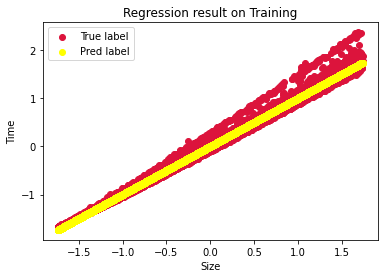

In [ ]:
y_pred = reg.predict(X_train_scale)
plt.scatter(X_train_scale, y_train_scale, c="crimson")
plt.scatter(X_train_scale, y_pred, c="yellow")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend(("True label", "Pred label"))
plt.title("Regression result on Training")
plt.show()

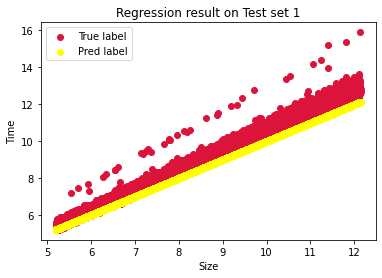

In [ ]:
y_pred = reg.predict(X_test_1_scale)
plt.scatter(X_test_1_scale, y_test_1_scale, c="crimson")
plt.scatter(X_test_1_scale, y_pred, c="yellow")
plt.xlabel("Size")
plt.ylabel("Time")
plt.legend(("True label", "Pred label"))
plt.title("Regression result on Test set 1")
plt.show()

# __Áp dụng một số phương pháp để cải thiện kết quả R2__

## Phương pháp 1: Loại các sample có kích thước nhỏ hơn 0.4 * 1e7 trong tập training

In [ ]:
df_train = pd.read_csv("./train.csv")
df_train = df_train.loc[df_train["size"] > 0.4 * 1e7]
df_train.describe()

,size,time
count,4.264600e+04,42646.000000
mean,6.998698e+06,0.575391
std,1.724112e+06,0.150183
min,4.000211e+06,0.303903
25%,5.502625e+06,0.445050
50%,6.993454e+06,0.573137
75%,8.499236e+06,0.705020
max,9.999882e+06,0.983776


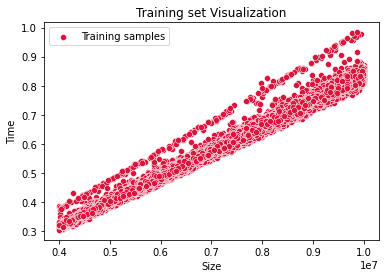

In [ ]:
sns.scatterplot(x='size', y='time', data=df_train, color='crimson')

plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(["Training samples"])
plt.title("Training set Visualization")
plt.show()

In [ ]:
# Training set
X_train, y_train = df_train.to_numpy(dtype=np.float32)[:, :-1], df_train.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

# Test set
X_test, y_test = df_test_1.to_numpy(dtype=np.float32)[:, :-1], df_test_1.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.score(X_test, y_test)

0.9656180444113118

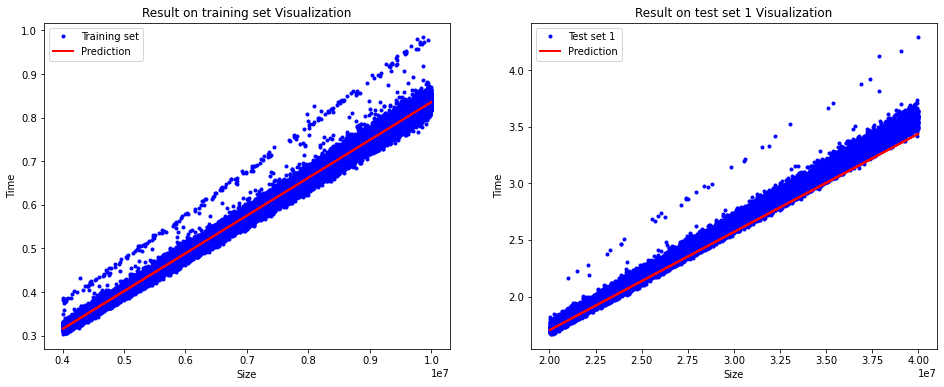

In [ ]:
fig = plt.figure(figsize=(16, 6))

# Training set
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train, 'b.', linewidth=1, label='Training set')
plt.plot(X_train, lin_reg.predict(X_train), 'r-', linewidth=2, label='Prediction')
plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(loc='upper left')
plt.title("Result on training set Visualization")

# Test set 1
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test, 'b.', linewidth=1, label='Test set 1')
plt.plot(X_test, lin_reg.predict(X_test), 'r-', linewidth=2, label='Prediction')
plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(loc='upper left')
plt.title("Result on test set 1 Visualization")
plt.show()

## Phương pháp 2: Sử dụng polynomial với phương trình có dạng $y = 𝞱_1 * x^\frac{1}{10} + 𝞱_2 * x^\frac{1}{10} * log(x) + 𝞱_3 * x + 𝞱_0$




In [ ]:
def polynomial_custom(X):
  return np.concatenate((X ** (1/10), X ** (1/10) * np.log(X), X), axis=1)

# Training set
X_train, y_train = df_train.to_numpy(dtype=np.float32)[:, :-1], df_train.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

# Test set
X_test, y_test = df_test_1.to_numpy(dtype=np.float32)[:, :-1], df_test_1.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

X_train_custom = polynomial_custom(X_train)
X_test_custom = polynomial_custom(X_test)

reg = LinearRegression()
reg.fit(X_train_custom, y_train)

LinearRegression()

In [ ]:
print("R2 score on test set 1: ", reg.score(X_test_custom, y_test))

R2 score on test set 1:  0.9878710068205038


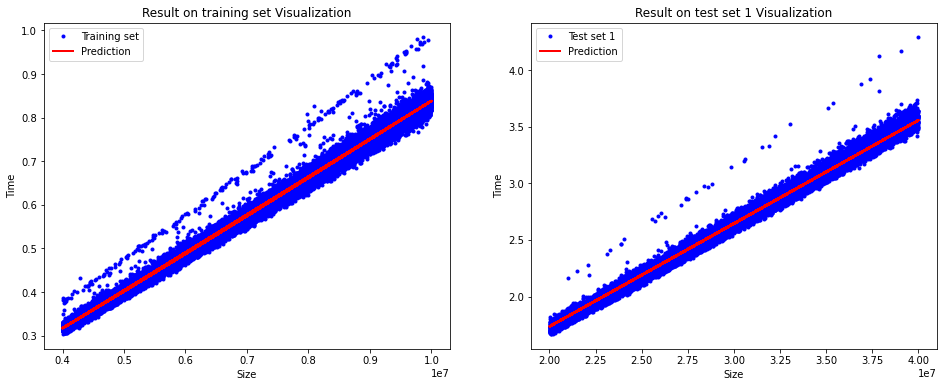

In [ ]:
fig = plt.figure(figsize=(16, 6))

# Training set
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train, 'b.', linewidth=1, label='Training set')
plt.plot(X_train, reg.predict(X_train_custom), 'r-', linewidth=2, label='Prediction')
plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(loc='upper left')
plt.title("Result on training set Visualization")

# Test set 1
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test, 'b.', linewidth=1, label='Test set 1')
plt.plot(X_test, reg.predict(X_test_custom), 'r-', linewidth=2, label='Prediction')
plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(loc='upper left')
plt.title("Result on test set 1 Visualization")
plt.show()

# __Thực hiện training trên tập test set 1 (data3) và test trên tập test set 2 (data4)__

In [ ]:
df_train = pd.read_csv("./test_1.csv")
df_train.describe()

,size,time
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


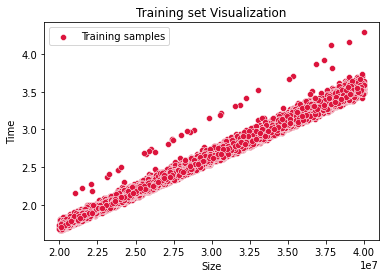

In [ ]:
sns.scatterplot(x='size', y='time', data=df_train, color='crimson')

plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(["Training samples"])
plt.title("Training set Visualization")
plt.show()

In [ ]:
def polynomial_custom(X):
  return np.concatenate((X ** (1/10), X ** (1/10) * np.log(X), X), axis=1)

# Training set
X_train, y_train = df_train.to_numpy(dtype=np.float32)[:, :-1], df_train.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

# Test set
X_test, y_test = df_test_2.to_numpy(dtype=np.float32)[:, :-1], df_test_2.to_numpy(dtype=np.float32)[:, -1].reshape(-1, 1)

X_train_custom = polynomial_custom(X_train)
X_test_custom = polynomial_custom(X_test)

reg = LinearRegression()
reg.fit(X_train_custom, y_train)

LinearRegression()

In [ ]:
print("R2 score on test set 2: ", reg.score(X_test_custom, y_test))

R2 score on test set 2:  0.9330611345348044


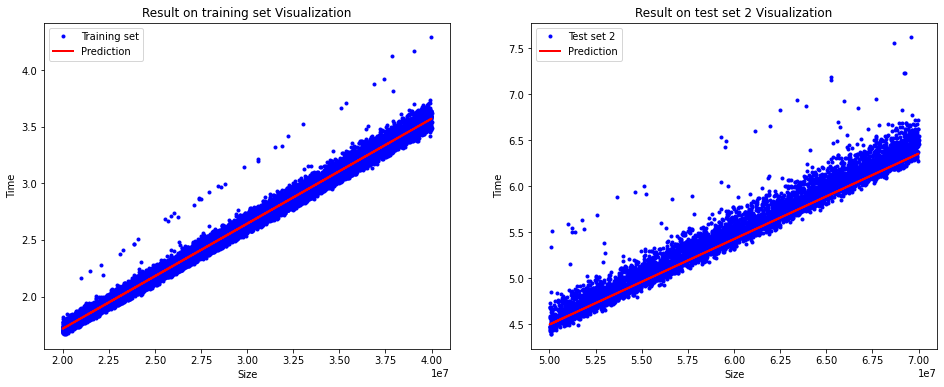

In [ ]:
fig = plt.figure(figsize=(16, 6))

# Training set
plt.subplot(1, 2, 1)
plt.plot(X_train, y_train, 'b.', linewidth=1, label='Training set')
plt.plot(X_train, reg.predict(X_train_custom), 'r-', linewidth=2, label='Prediction')
plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(loc='upper left')
plt.title("Result on training set Visualization")

# Test set 1
plt.subplot(1, 2, 2)
plt.plot(X_test, y_test, 'b.', linewidth=1, label='Test set 2')
plt.plot(X_test, reg.predict(X_test_custom), 'r-', linewidth=2, label='Prediction')
plt.xlabel("Size")
plt.ylabel("Time")

plt.legend(loc='upper left')
plt.title("Result on test set 2 Visualization")
plt.show()

# __Nhận xét__
| STT | Phương pháp                                                               | Training Set | Test Set | R2 Score |
|-----|---------------------------------------------------------------------------|--------------|----------|----------|
| 1   | Linear Regression                                                         | data2        | data3    | 0.926    |
| 2   | SGD Linear Regression + Grid Search                                       | data2        | data3    | 0.927    |
| 3   | Linear Regression + loại bỏ training sample có size nhỏ hơn 0.4 * 1e7     | data2        | data3    | 0.965    |
| 4   | Polynomial Regression + loại bỏ training sample có size nhỏ hơn 0.4 * 1e7 | data2        | data3    | 0.987    |
| 5   | Polynomial Regression                                                     | data3        | data4    | 0.933    |

- Có thể thấy khi loại bỏ các mẫu dữ liệu có size nhỏ hơn 0.4 * 1e7 ở data2, điểm R2 tăng -> các điểm dữ liệu có size nhỏ hơn 0.4 * 1e7 không mang lại quá nhiều thông tin và có thể coi là nhiễu.
- Khi áp dụng Polynomial Regression, có thể thấy rằng việc tạo thêm các đặc trưng từ các hàm toán học cơ bản có thể giúp mô hình fit với dữ liệu test hơn.